# Performing Psychographic Segmentation Based on Customer Behaviour

## Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from datetime import datetime
import warnings
import sys
import os

In [2]:
df = pd.read_csv('marketing_campaign.csv')

In [3]:
df.head(100)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7516,1983,Graduation,Married,30096.0,1,0,22-05-2014,30,5,...,6,0,0,0,0,0,0,3,11,0
96,7247,1960,Graduation,Widow,47916.0,0,1,22-11-2012,72,505,...,6,0,1,0,0,0,0,3,11,0
97,11100,1972,Graduation,Divorced,51813.0,1,1,11/4/2013,37,51,...,7,0,0,0,0,0,0,3,11,0
98,4646,1951,2n Cycle,Married,78497.0,0,0,1/12/2013,44,207,...,2,0,0,0,1,0,0,3,11,0


# Features:
______________________________________________________________________________________________________________
### People

* ID: Customer's unique identifier  
* Year_Birth: Customer's birth year  
* Education: Customer's education level  
* Marital_Status: Customer's marital status  
* Income: Customer's yearly household income  
* Kidhome: Number of children in customer's household  
* Teenhome: Number of teenagers in customer's household  
* Dt_Customer: Date of customer's enrollment with the company  
* Recency: Number of days since customer's last purchase  
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise  

### Products

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

### Promotion

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month
______________________________________________________________________________________________________________


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
print(f'Size of Dataset: {df.shape}')

Size of Dataset: (2240, 29)


In [6]:
# warnings are ignored.
warnings.filterwarnings('ignore')  

### Optimize the memory usage (optional)

* The dataframe entirely can be heavy of memory as it conists of all the dataset along with datatypes that can be reduced to fit with approriate data types.

In [7]:
def reduce_mem_usage(df: pd.DataFrame) -> pd.DataFrame:
    """Iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage"""
    
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of DataFrame is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [8]:
df = reduce_mem_usage(df)

Memory usage of DataFrame is 0.50 MB
Memory usage after optimization is: 0.11 MB
Decreased by 78.0%


## 3.1) Feature generation

In [9]:
# Age of the Customer
df['Age'] = datetime.now().year - df['Year_Birth']
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)

In [10]:
def get_different_year():
    registration_year = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y').apply(lambda x: x.year)
    current_year = datetime.now().year
    return current_year - registration_year

df['Years_Since_Registration'] = get_different_year()

In [11]:
df["Education"] = df["Education"].replace({"Basic": 0, "Graduation": 1, "2n Cycle": 2, "Master": 2, "PhD": 3})
# Encoded in numbers in order

In [12]:
df['Marital_Status'] = df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone",
    "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})

step_2 = df['Marital_Status'].replace({'Alone': 1, 'Partner': 2})

df["Family_Size"] = df['Marital_Status'].replace({'Alone': 1, 'Partner': 2}).astype(np.int8) + df['Kidhome'].astype(np.int8) + df['Teenhome'].astype(np.int8)  # Total number of people in the family

df = pd.concat([df, pd.get_dummies(df['Marital_Status'])], axis=1)  # Separate features for Alone and Partner

In [13]:
mnt_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Sum_Mnt'] = df[mnt_cols].sum(axis=1)  # Total amount spent on products

In [14]:
accepted_cmp_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                     'Response']
df['Num_Accepted_Cmp'] = df[accepted_cmp_cols].sum(axis=1)  
# Number of companies in which the client accepted the offer

In [15]:
total_purchases = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['Num_Total_Purchases'] = df[total_purchases].sum(axis=1)  # Total number of purchases

# Let's look at EDA:
______________________________________________________________________________________________________________

## First, let's look at the correlation matrix:

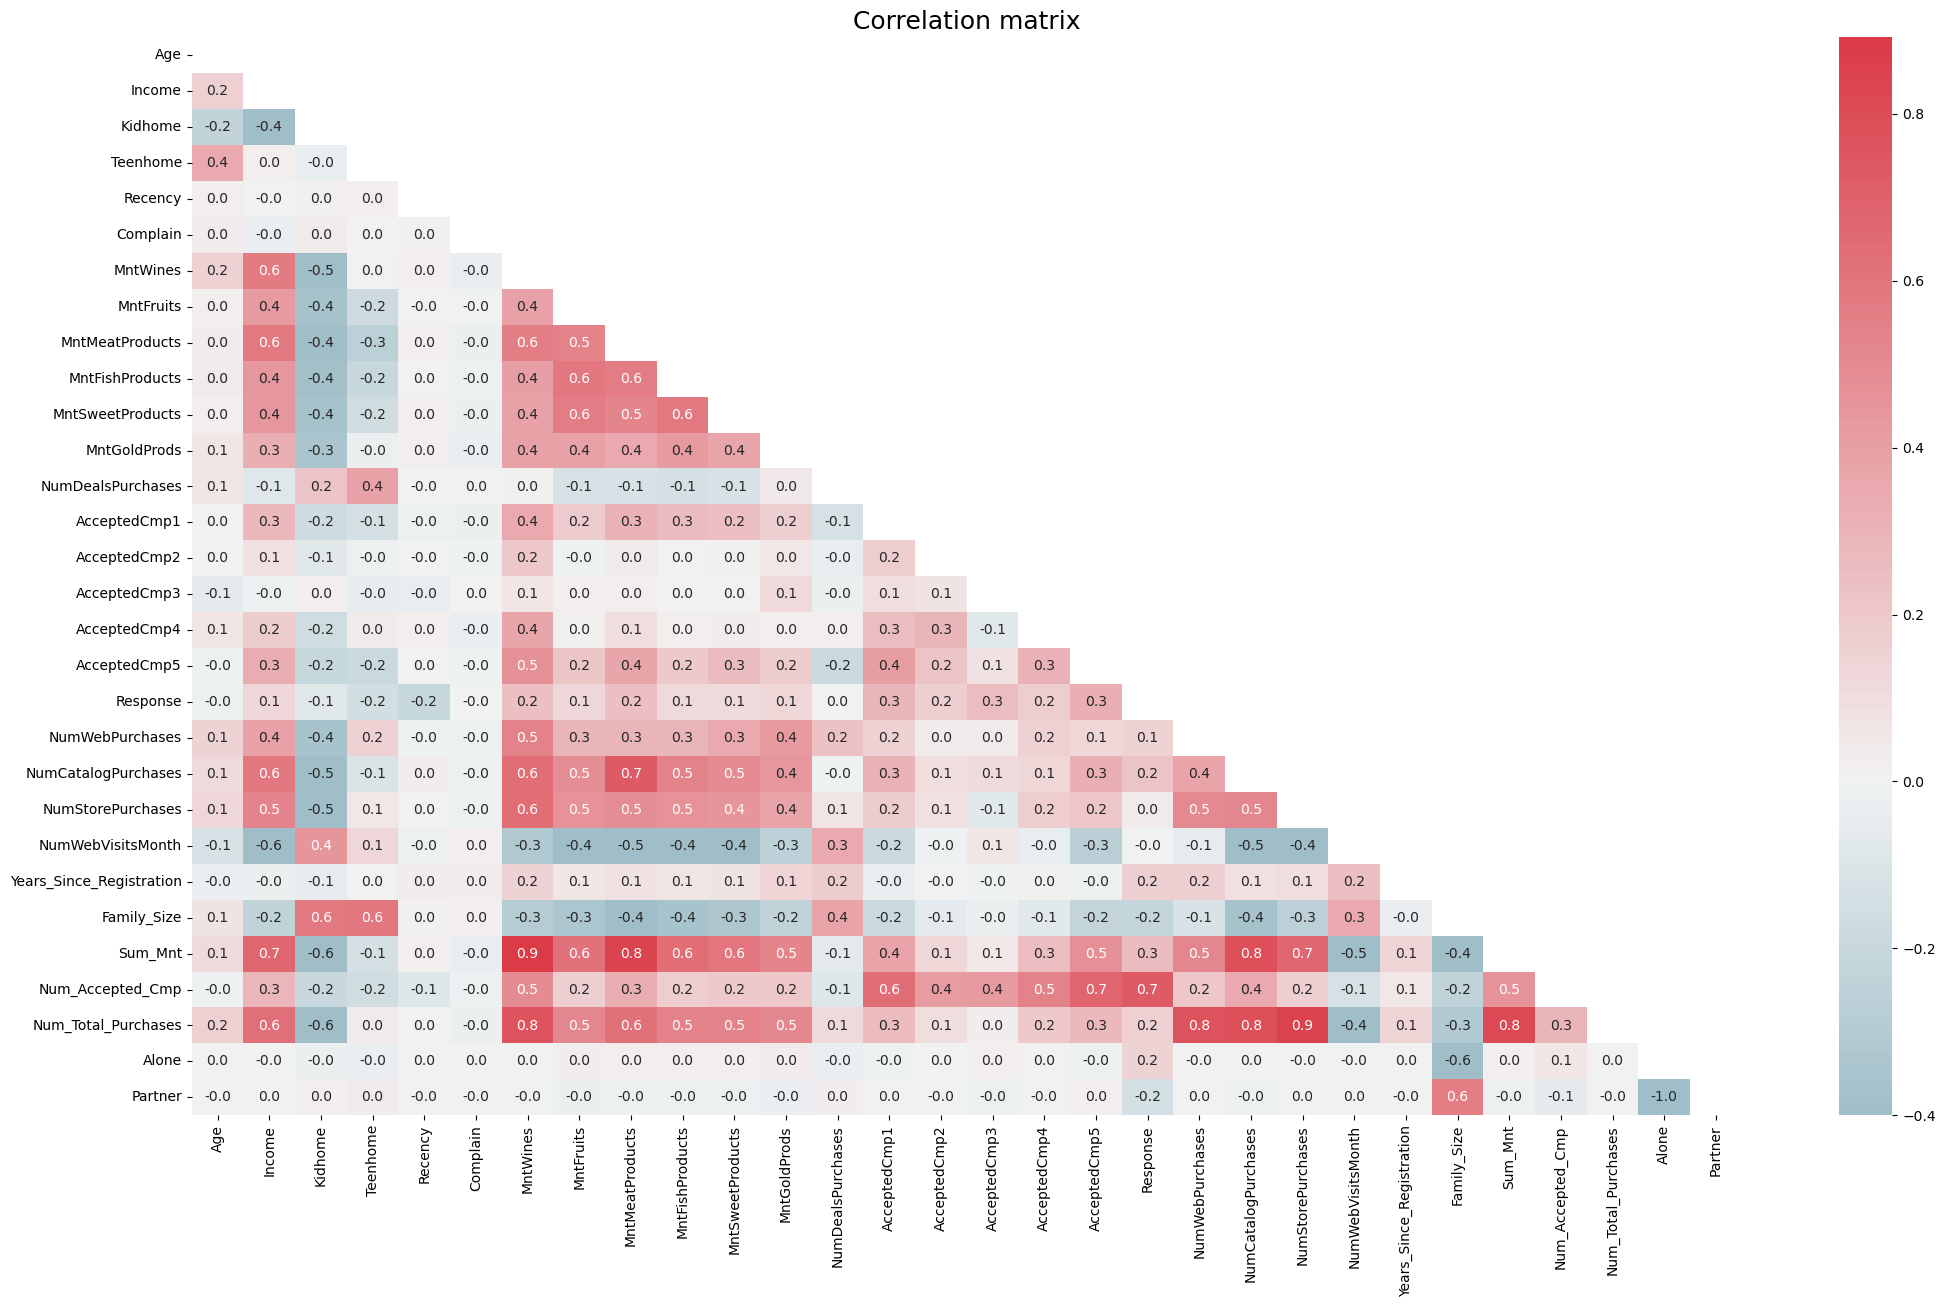

In [16]:
to_corr = ['Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain', 
          'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
          'MntGoldProds', 'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
          'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'NumWebPurchases', 'NumCatalogPurchases', 
          'NumStorePurchases', 'NumWebVisitsMonth', 'Years_Since_Registration', 'Family_Size',
           'Sum_Mnt', 'Num_Accepted_Cmp', 'Num_Total_Purchases', 'Alone', 'Partner']

cmap = sns.diverging_palette(220, 10, as_cmap=True)
matrix = np.triu(df[to_corr].corr())
plt.figure(figsize=(25, 14))
plt.title('Correlation matrix', fontsize=18)
sns.heatmap(df[to_corr].corr(), annot=True,
            fmt='.1f', vmin=-0.4, center=0, cmap=cmap, mask=matrix)

plt.show()

## Next, look at the distributions of quantitative variables:

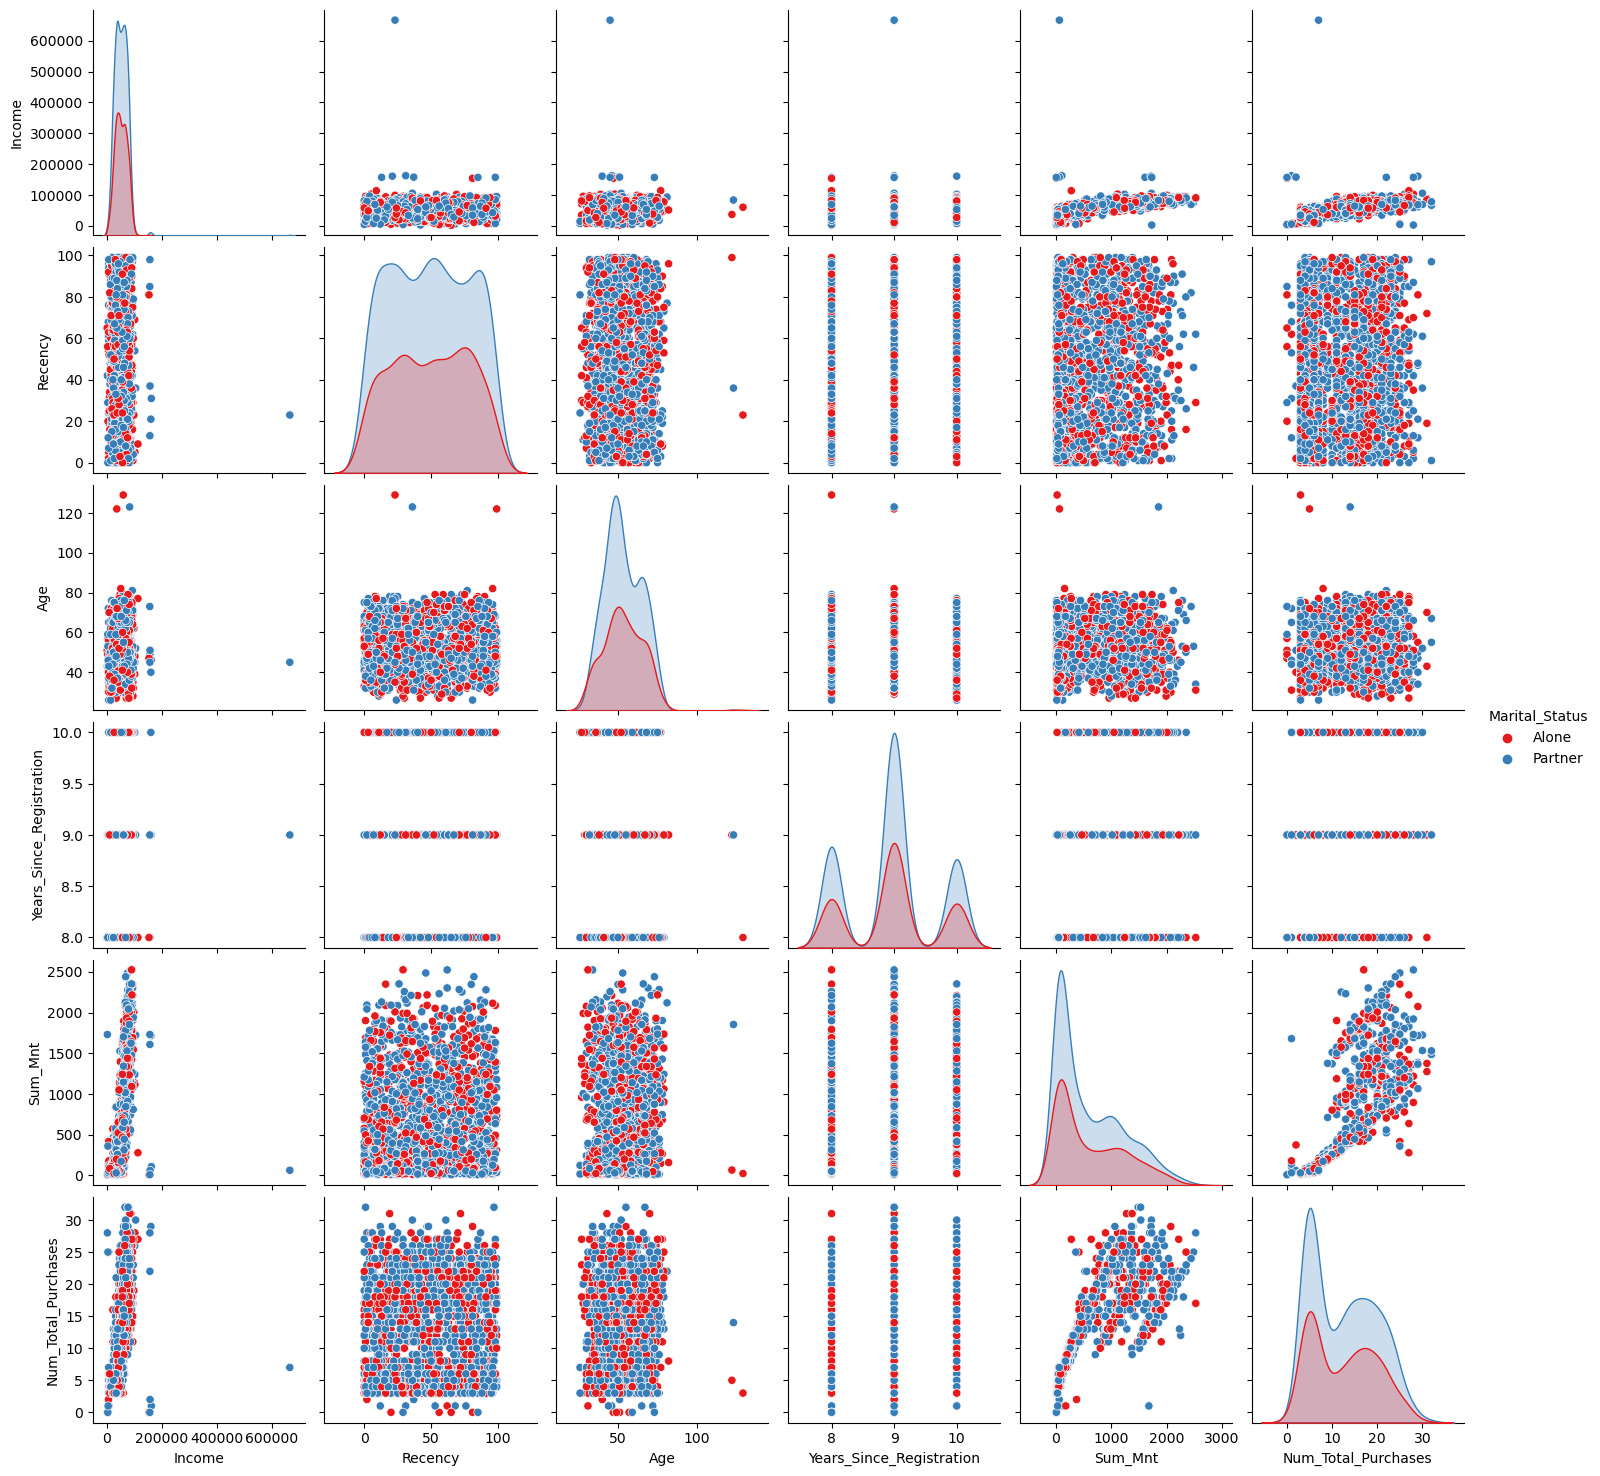

In [17]:
to_plot = ['Income', 'Recency', 'Age', 'Years_Since_Registration', 'Sum_Mnt',
           'Num_Total_Purchases', 'Marital_Status']
sns.pairplot(df[to_plot], hue='Marital_Status', palette='Set1')
plt.show()

## 3.2) Data cleaning

## Remove gaps in the data:

In [18]:
df.isna().sum()

ID                           0
Year_Birth                   0
Education                    0
Marital_Status               0
Income                      24
Kidhome                      0
Teenhome                     0
Dt_Customer                  0
Recency                      0
MntWines                     0
MntFruits                    0
MntMeatProducts              0
MntFishProducts              0
MntSweetProducts             0
MntGoldProds                 0
NumDealsPurchases            0
NumWebPurchases              0
NumCatalogPurchases          0
NumStorePurchases            0
NumWebVisitsMonth            0
AcceptedCmp3                 0
AcceptedCmp4                 0
AcceptedCmp5                 0
AcceptedCmp1                 0
AcceptedCmp2                 0
Complain                     0
Z_CostContact                0
Z_Revenue                    0
Response                     0
Age                          0
Years_Since_Registration     0
Family_Size                  0
Alone   

In [19]:
df.dropna(inplace=True)  # Removed objects with gaps in income

## Remove outliers in the data:

In [20]:
def remove_outliers(data: pd.DataFrame, column: str) -> pd.Series:
    q3, q1 = np.nanpercentile(data[column], [75, 25])
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]

    return data

df = remove_outliers(df, 'Age')
df = remove_outliers(df, 'Income')

## Remove unnecessary features:

In [21]:
df.drop(['Year_Birth', 'ID', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer', 'Marital_Status'], axis=1, inplace=True)

## 3.3) Data scaling (Normalization | Standardization)

In [22]:
def scaling_func(df: pd.DataFrame) -> None:
    mms = MinMaxScaler()
    return pd.DataFrame(data=mms.fit_transform(df), columns=df.columns)


df_scaled = scaling_func(df)
# to ensure
df_scaled.index = df.index

## 4) Dimensionality reduction

In [23]:
def dim_reduction(data: pd.DataFrame) -> pd.DataFrame:
    n_components = 8
    pca = PCA(n_components=n_components, random_state=42)
    data = pd.DataFrame(pca.fit_transform(data), columns =([f'PC{i}' for i in range(1, n_components + 1)]))
    return data

# df: scaling + dimensionality reduction
df_transform = dim_reduction(df_scaled)  
df_transform.index = df_scaled.index

## 5) Clustering

In this work, the following clustering algorithms will be used: (https://scikit-learn.org/stable/modules/clustering.html)
* K-means ++ 
* Aglomerative clustering
* Spectral clustering


It is noteworthy that in these algorithms it is necessary to pre-specify the number of clusters.     
We assume that the minimum number of clusters is two, the maximum number of clusters is eight. Based on this, for different cases of the number of clusters, we will build models.    
If the metric is maximum for models with a large number of clusters, then we will iteratively increase the maximum number of clusters and build new models.


In [25]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # as given by sklearn docs
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

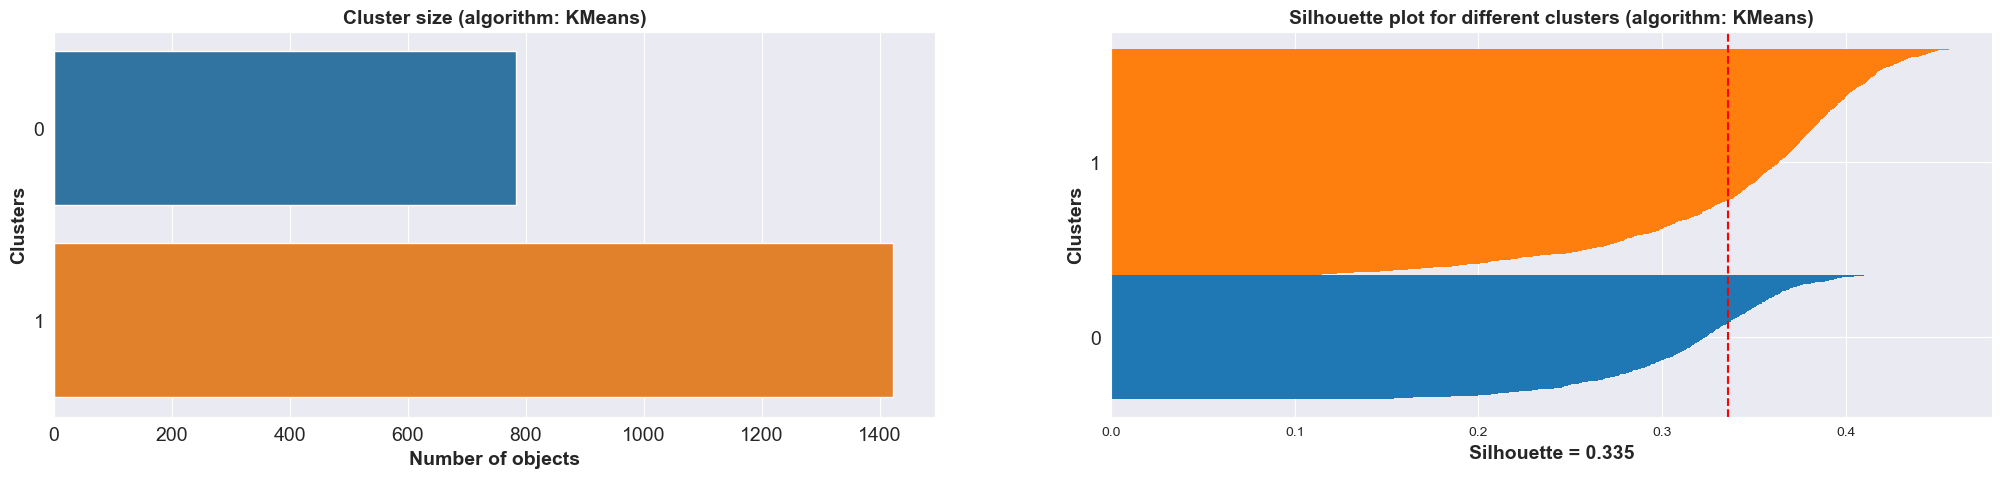

****************************************************************************************************************


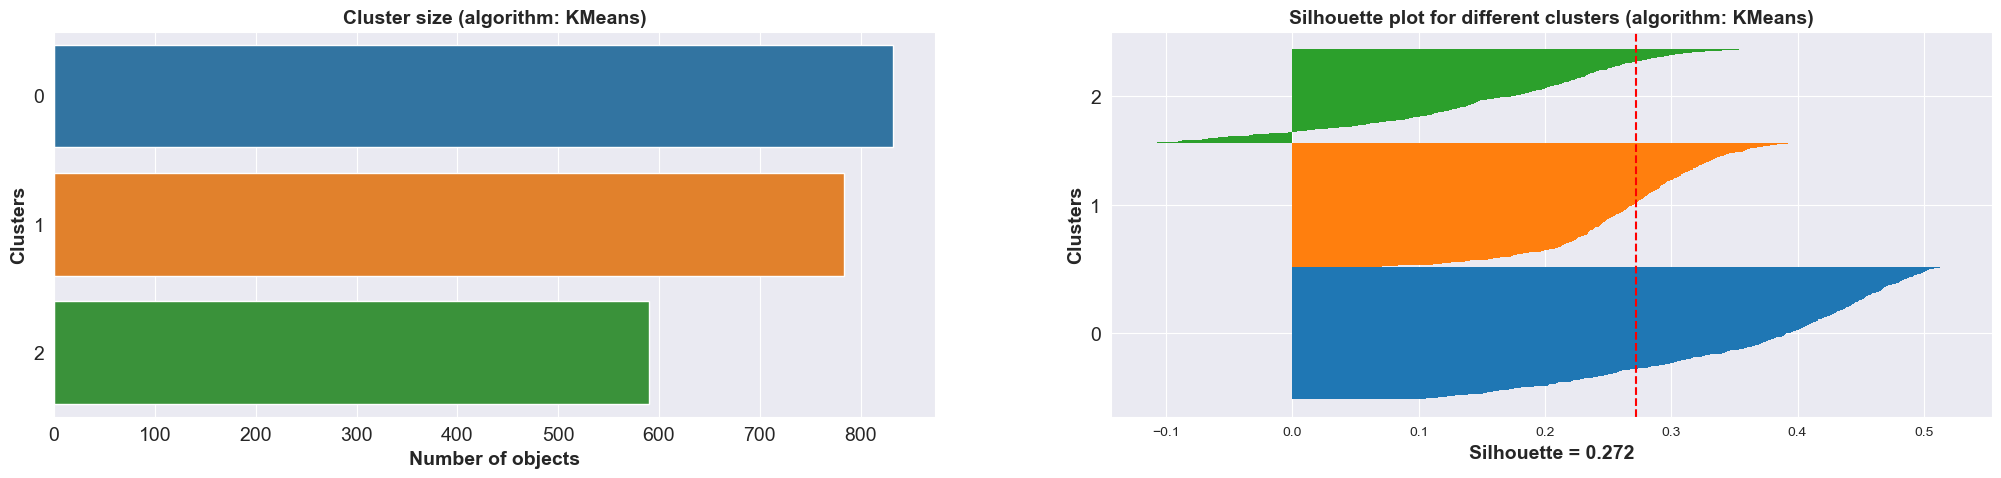

****************************************************************************************************************


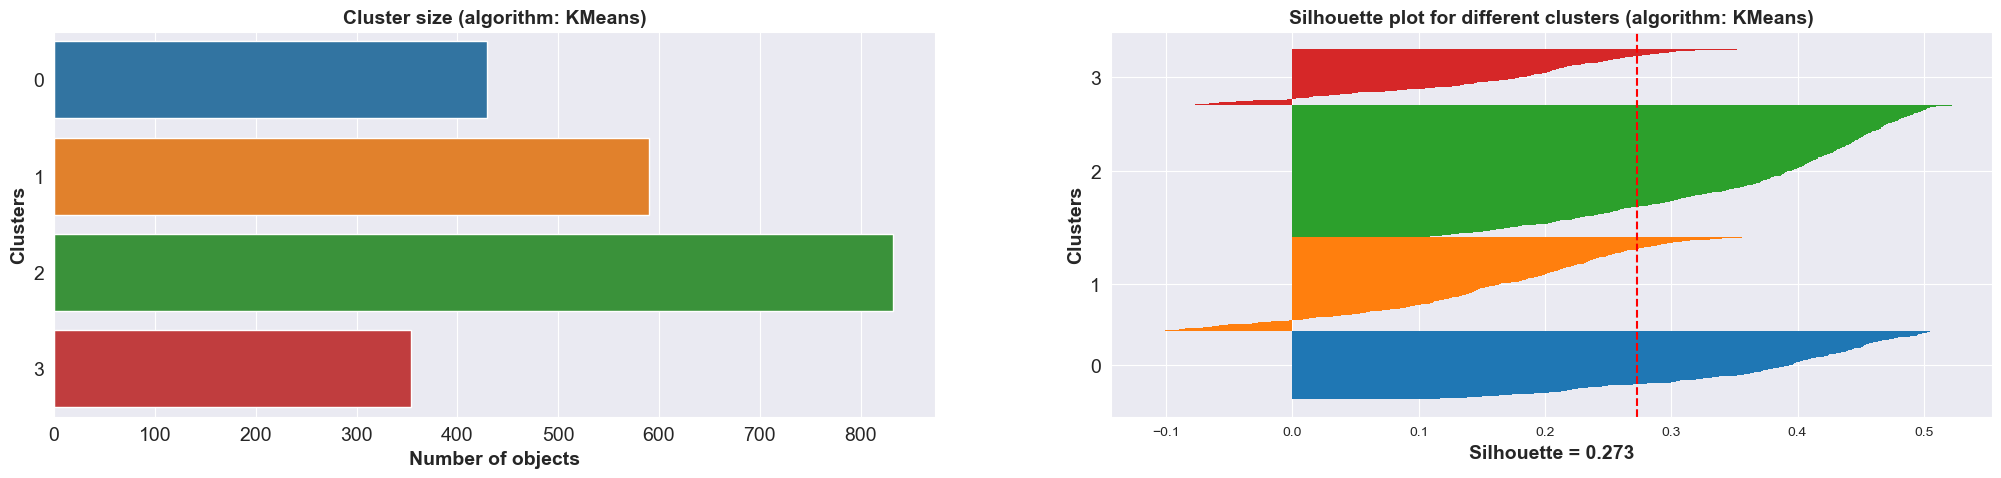

****************************************************************************************************************


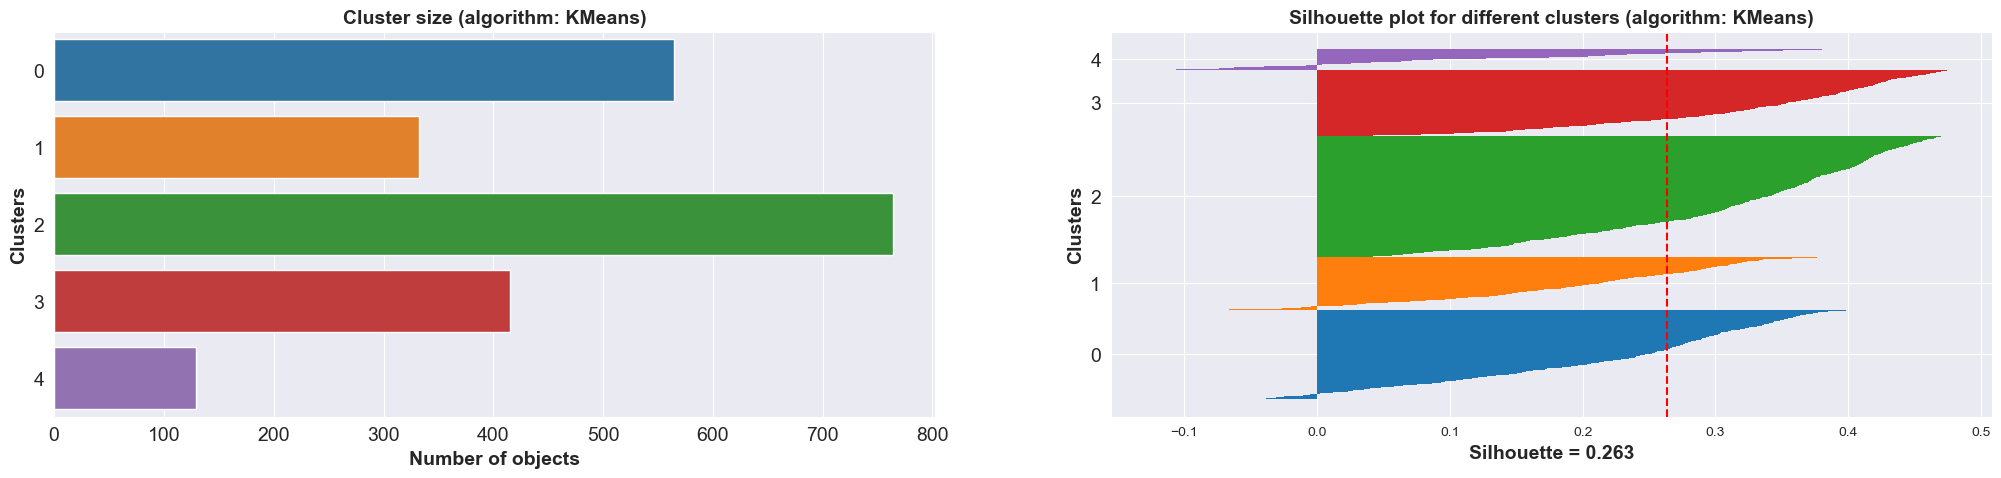

****************************************************************************************************************


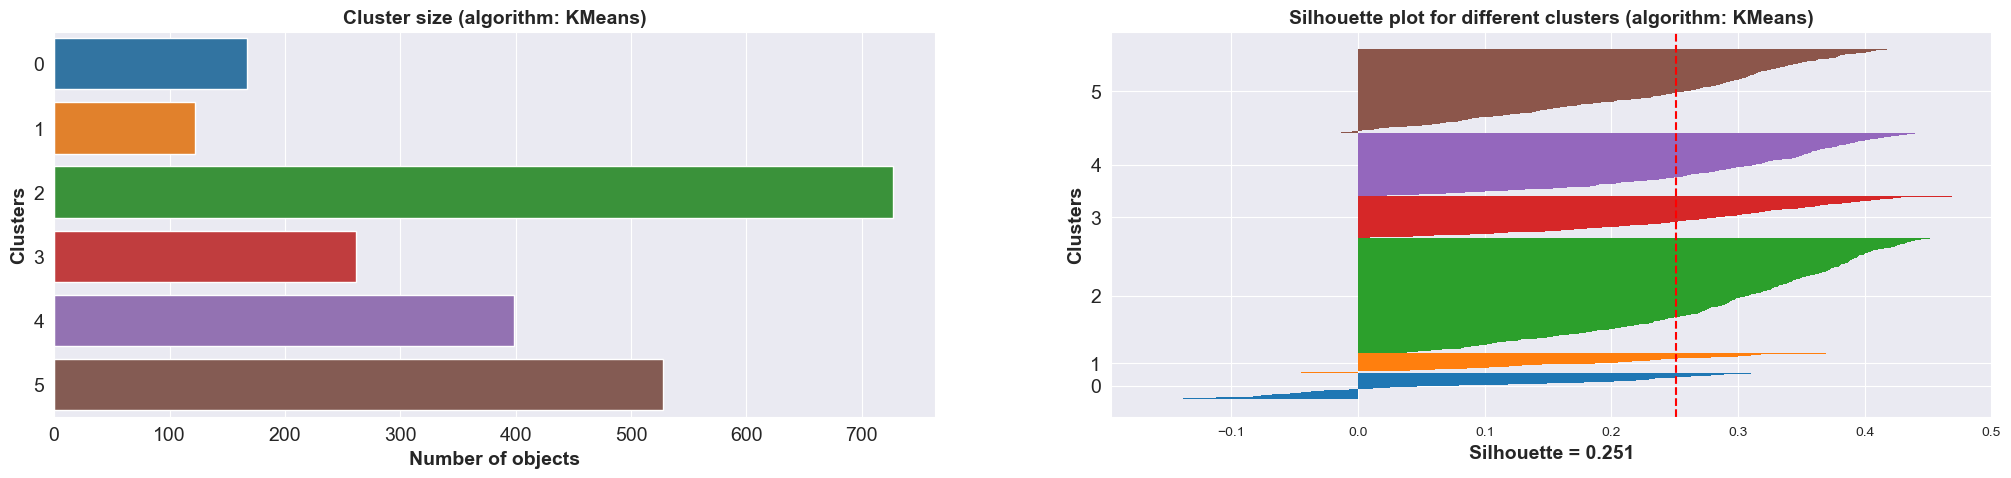

****************************************************************************************************************


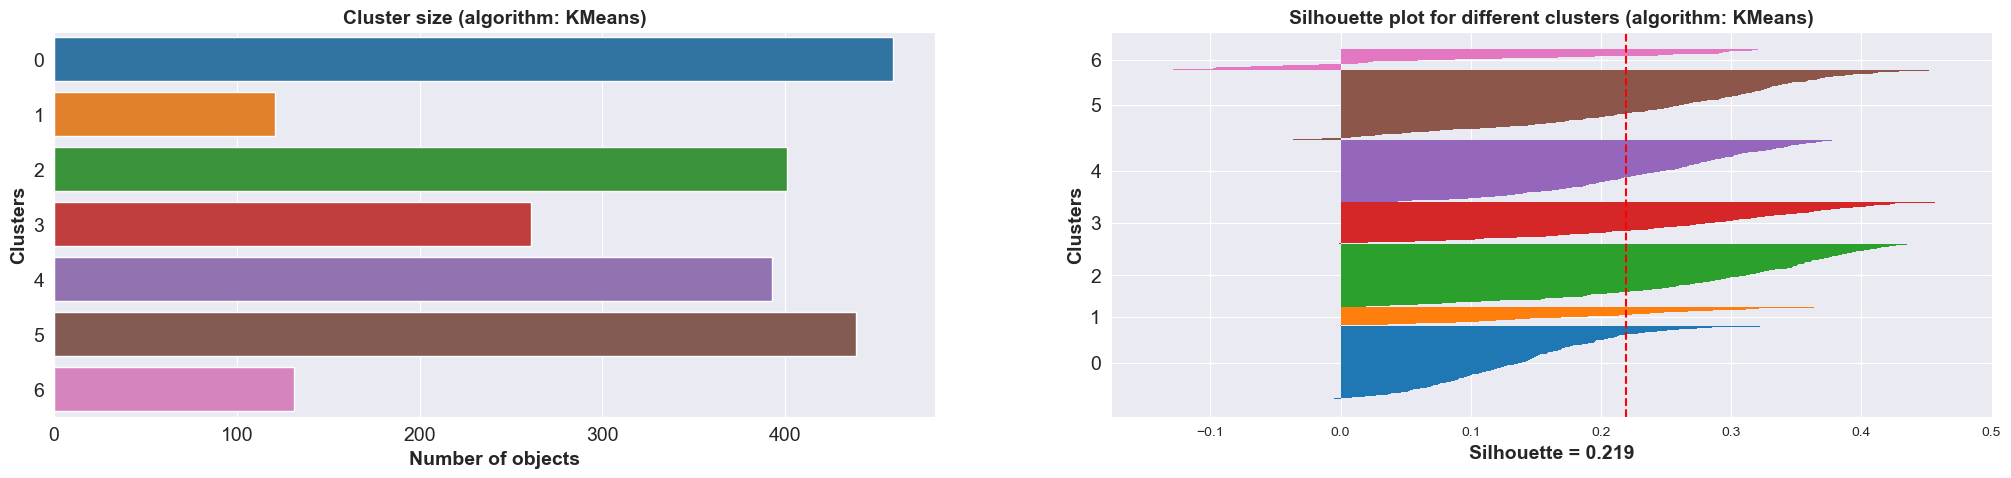

****************************************************************************************************************


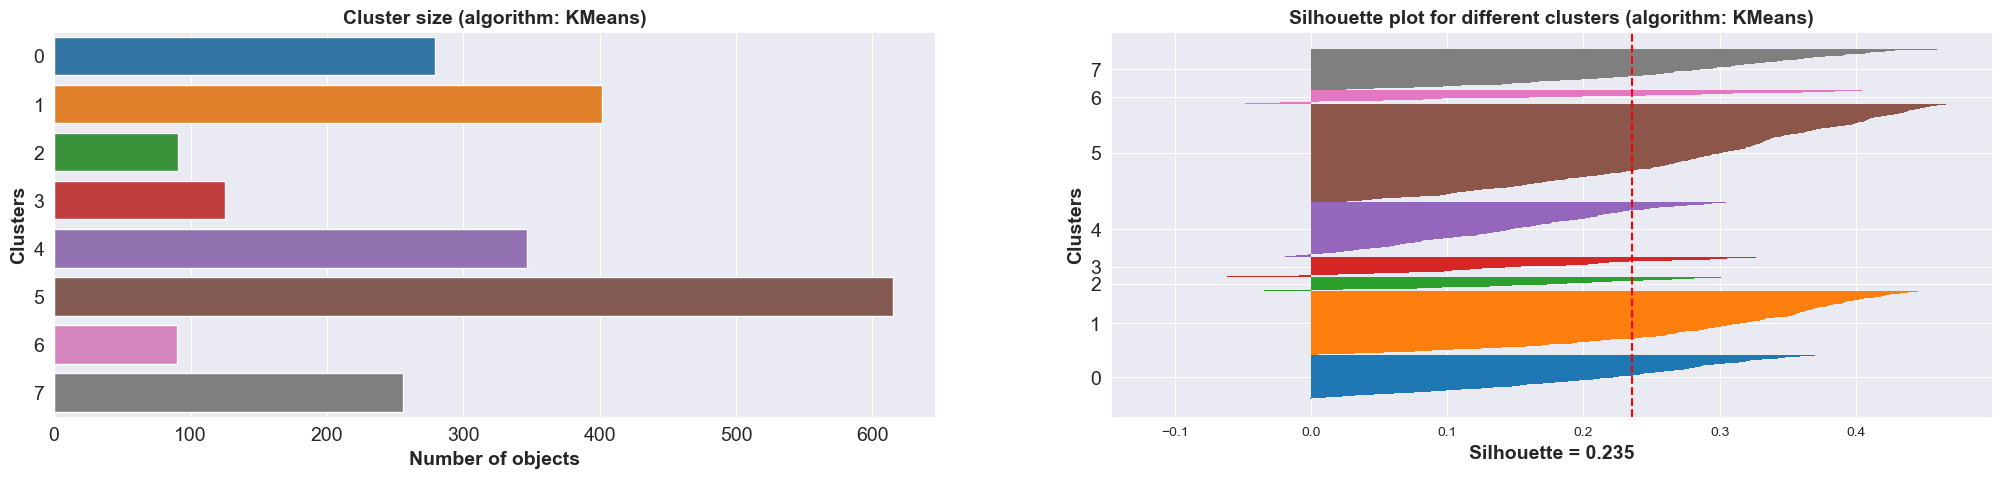

****************************************************************************************************************


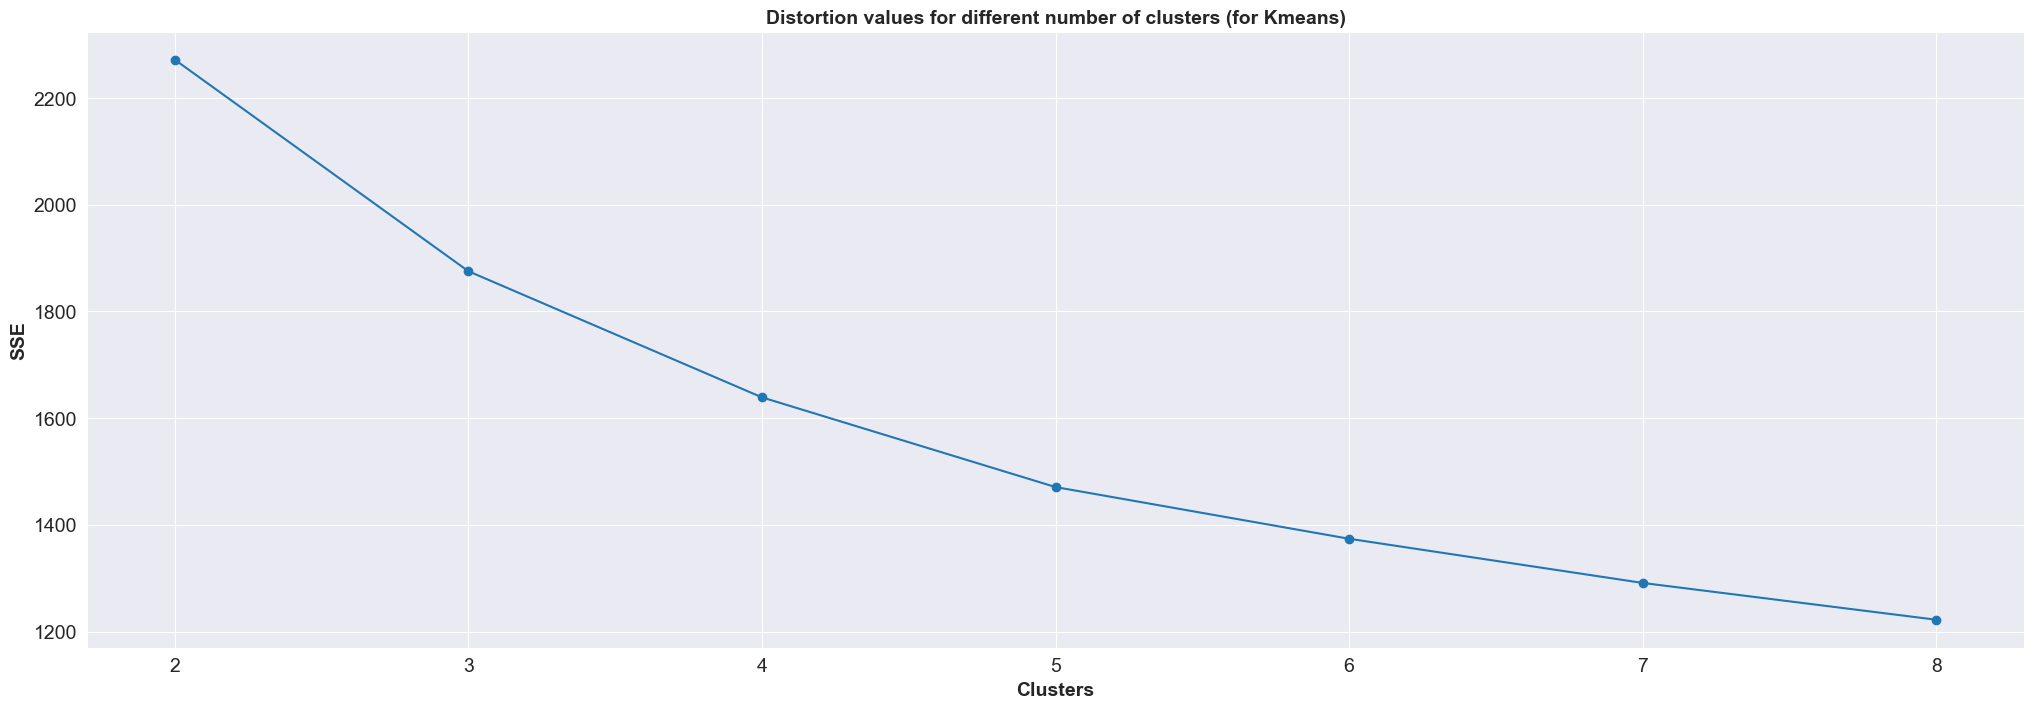

****************************************************************************************************************


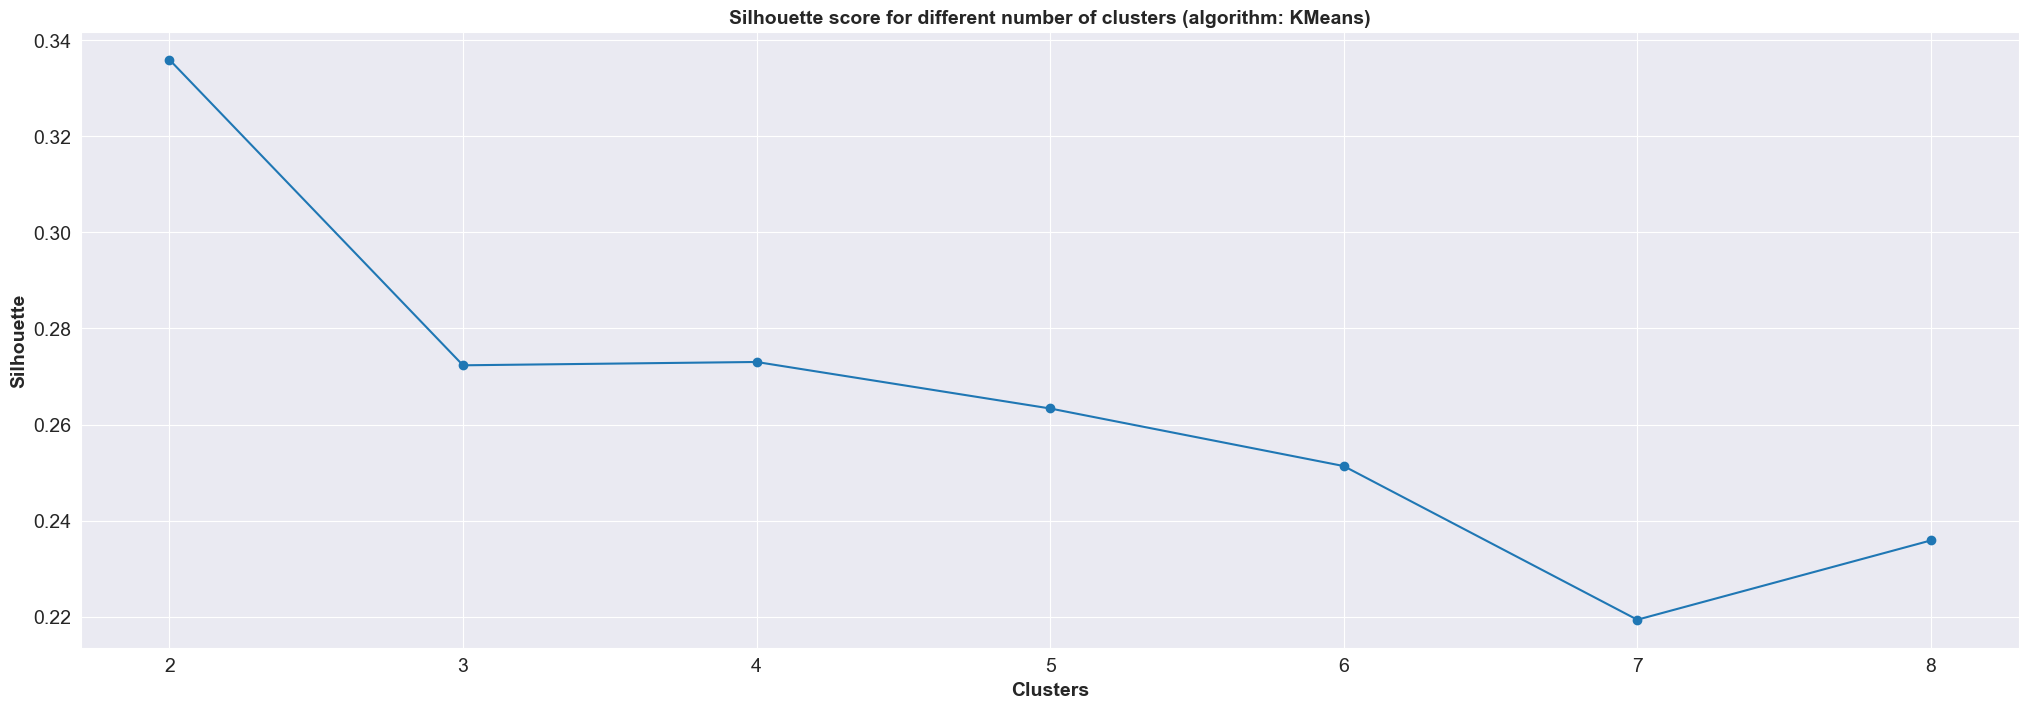

****************************************************************************************************************


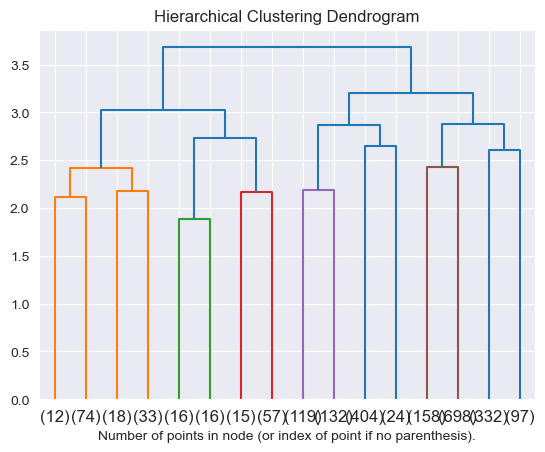

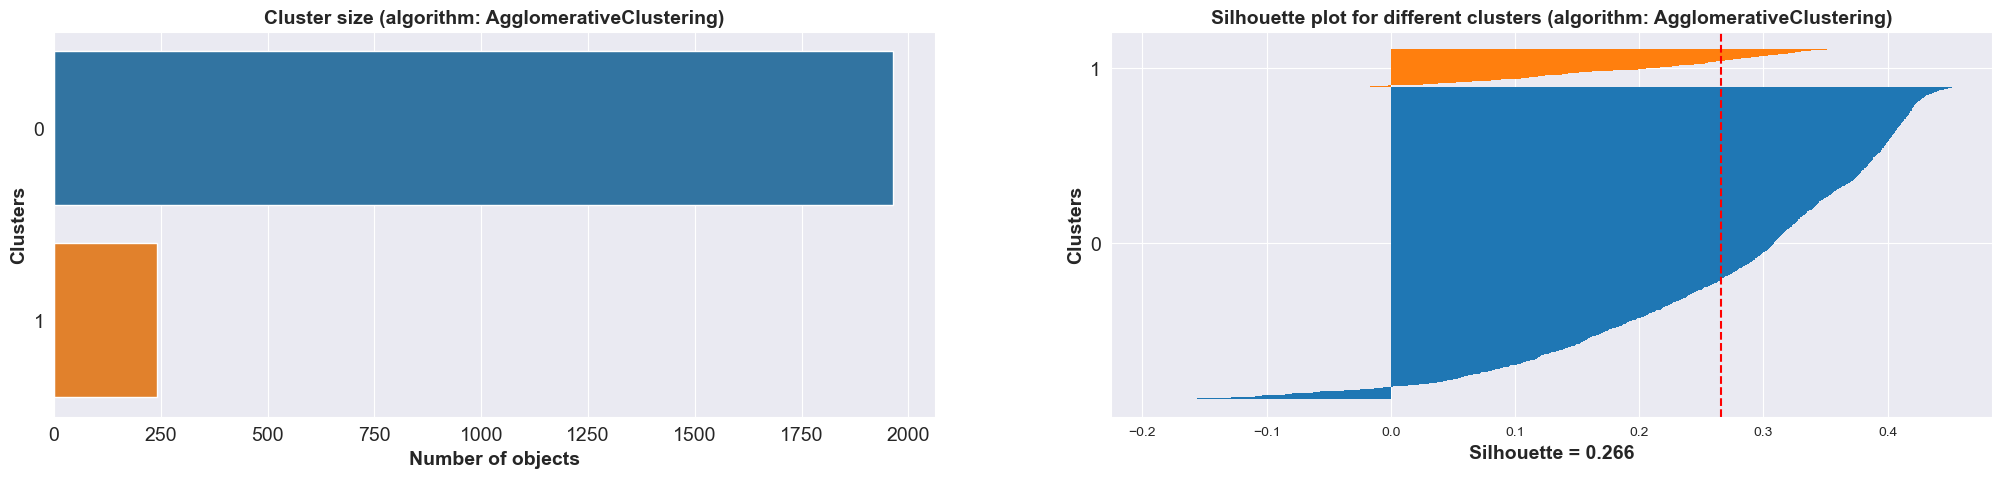

****************************************************************************************************************


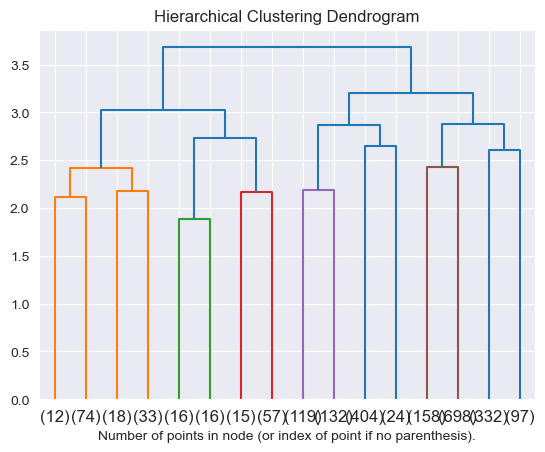

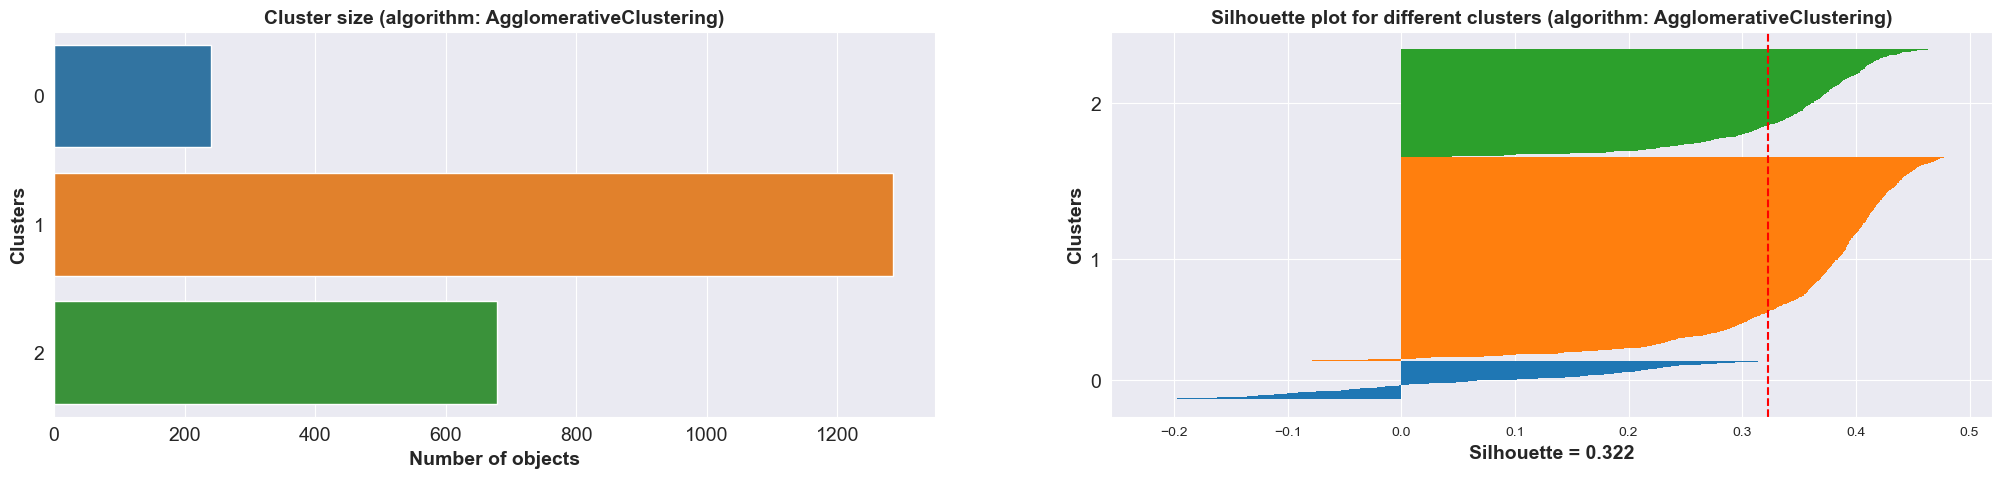

****************************************************************************************************************


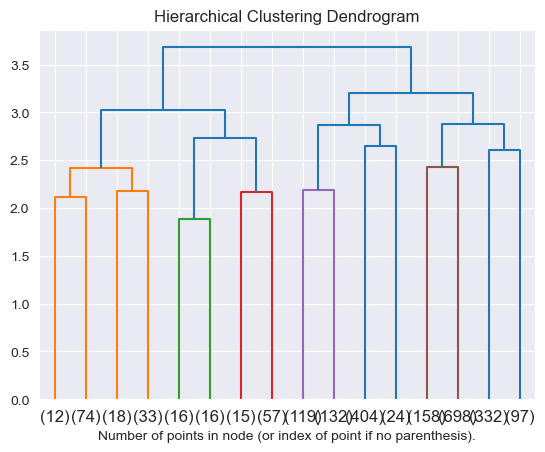

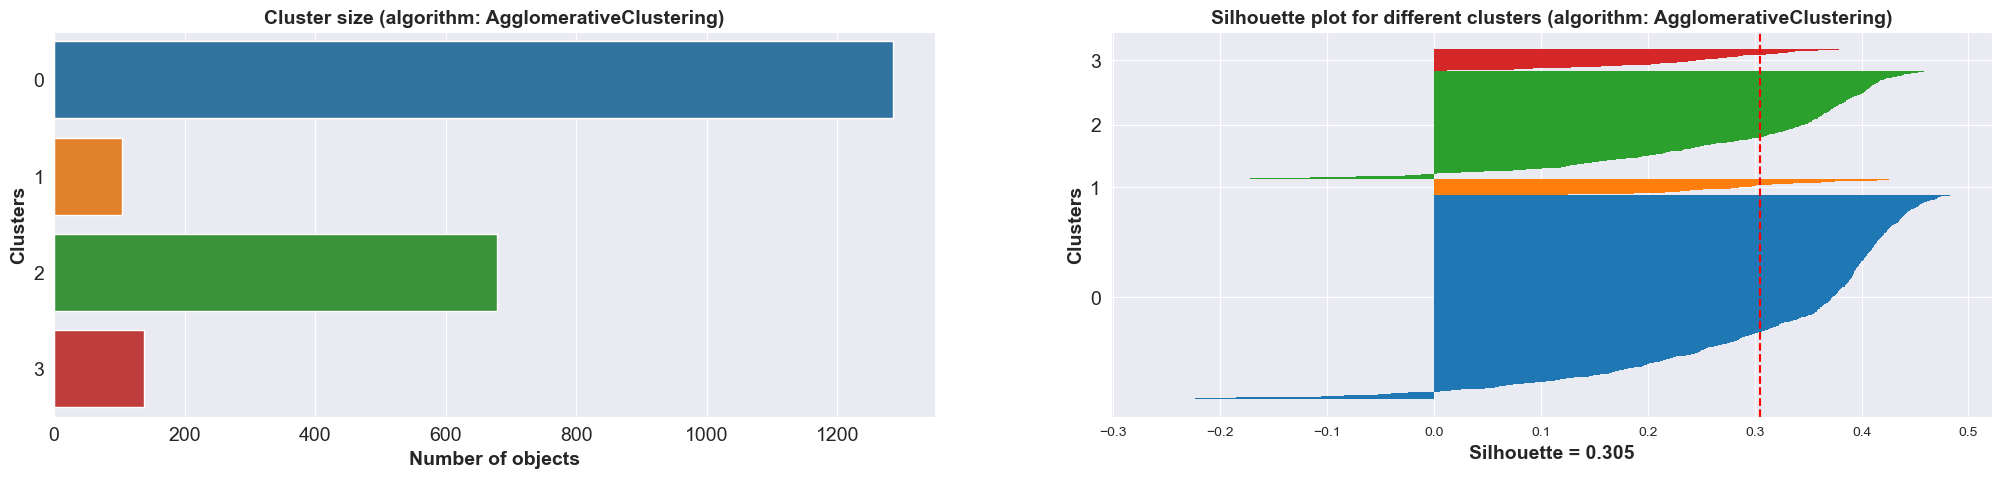

****************************************************************************************************************


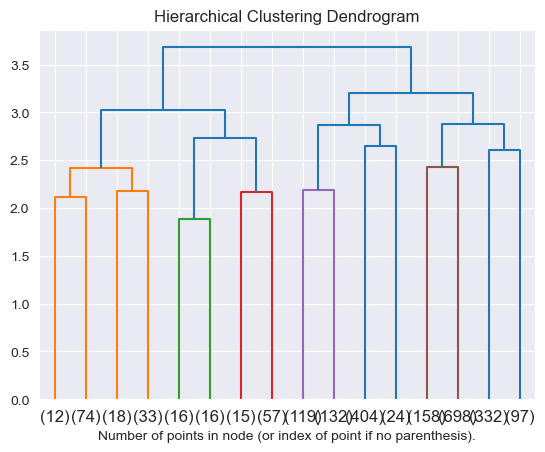

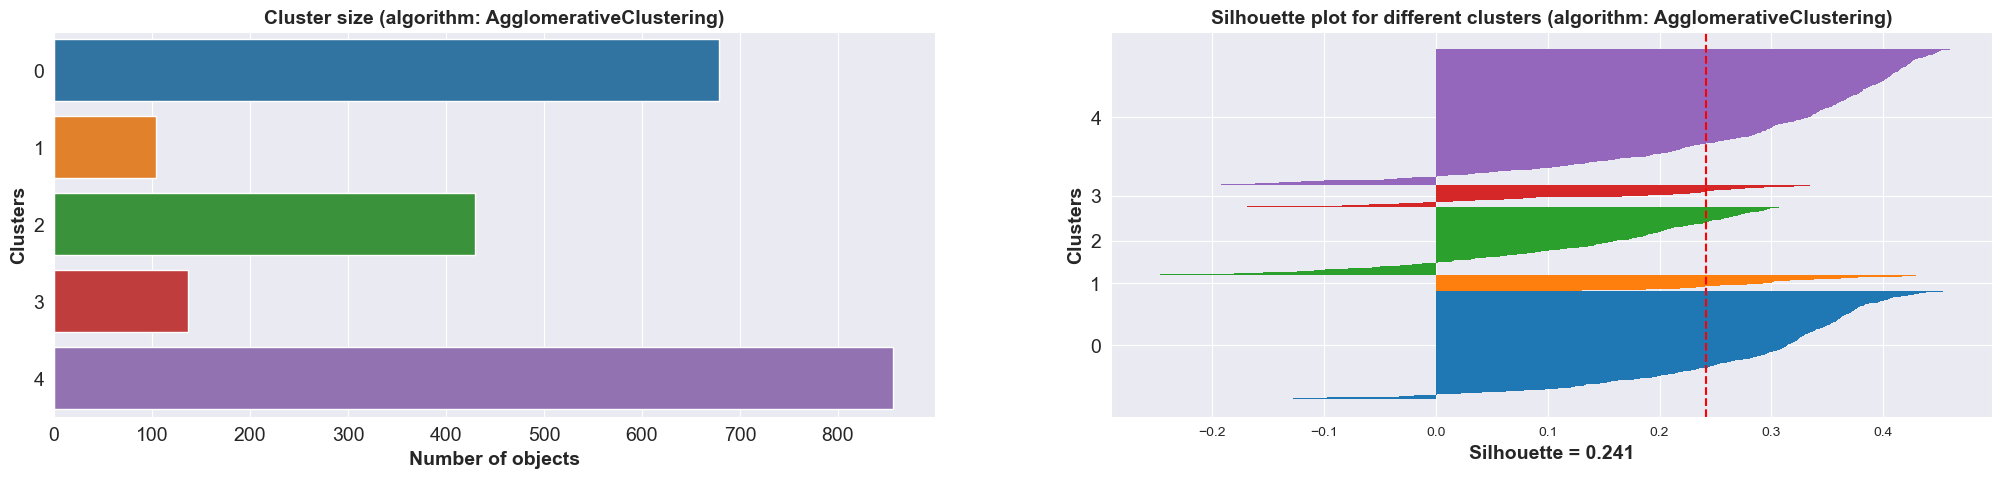

****************************************************************************************************************


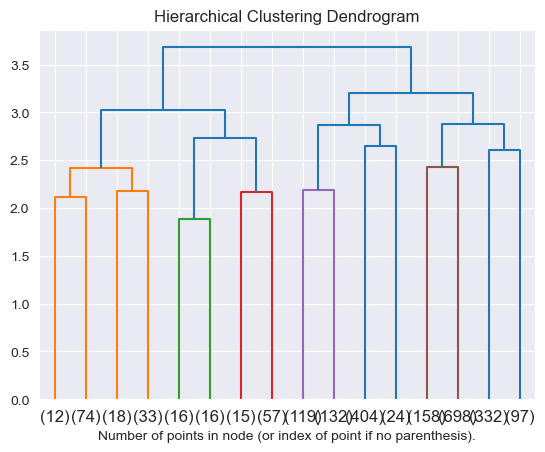

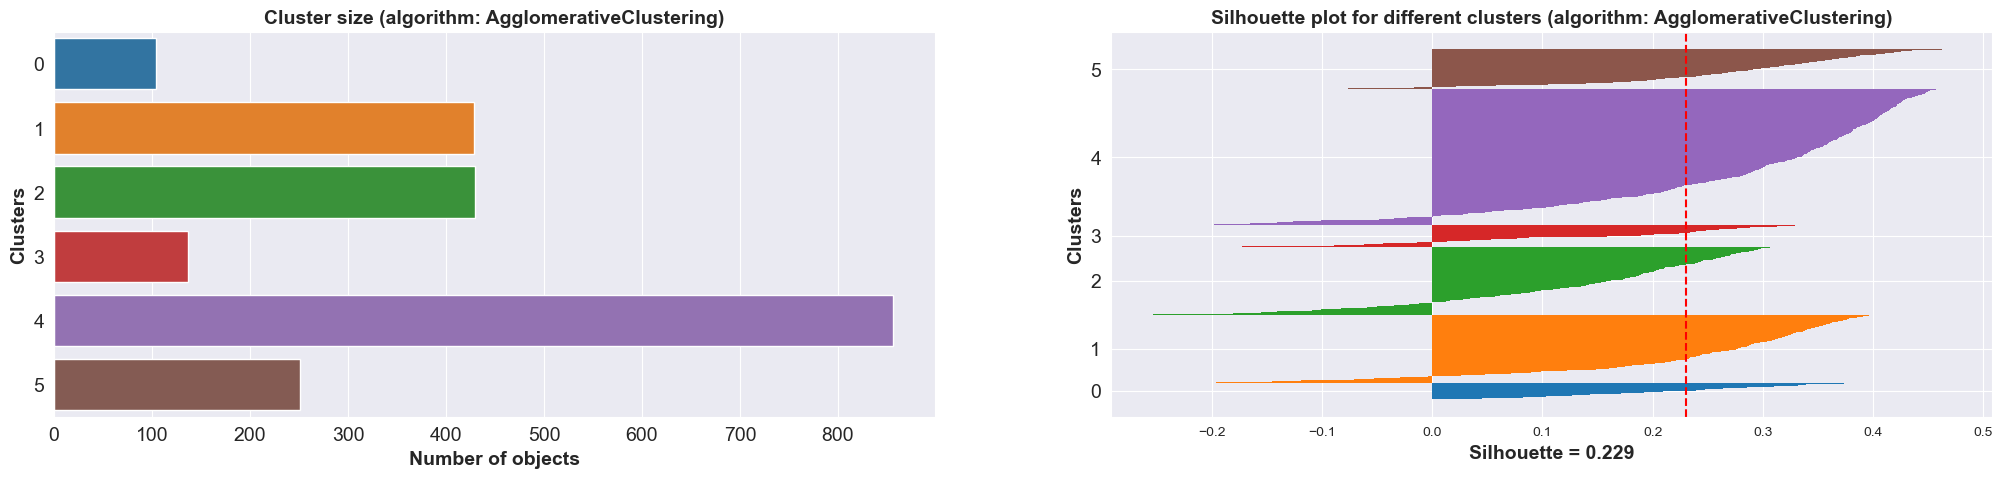

****************************************************************************************************************


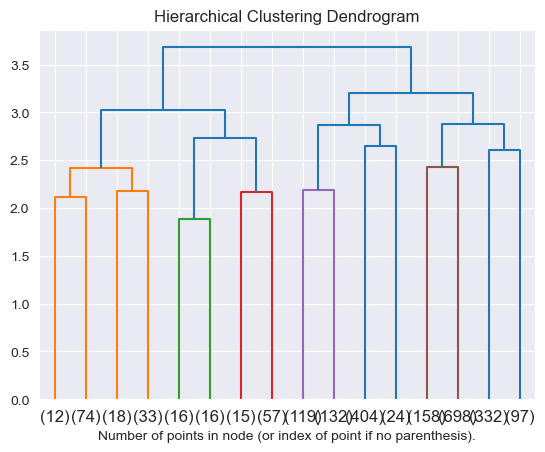

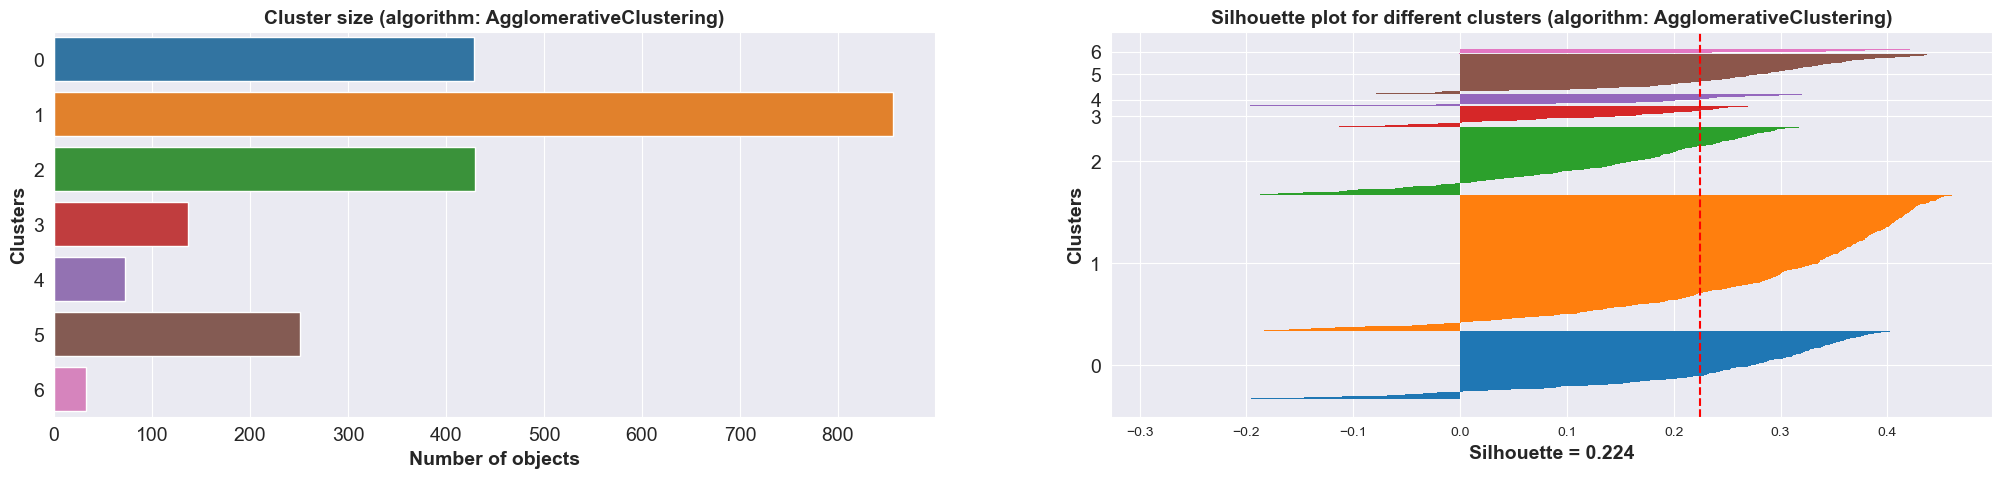

****************************************************************************************************************


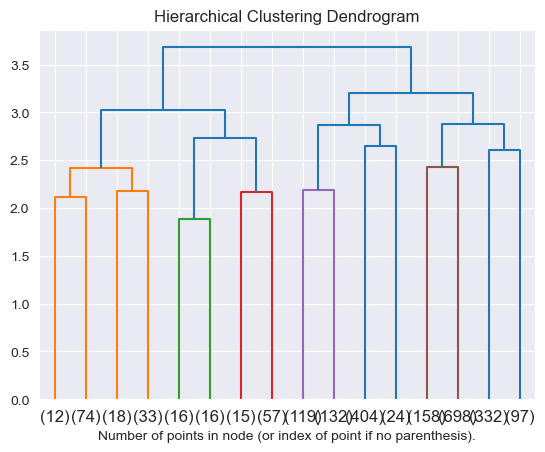

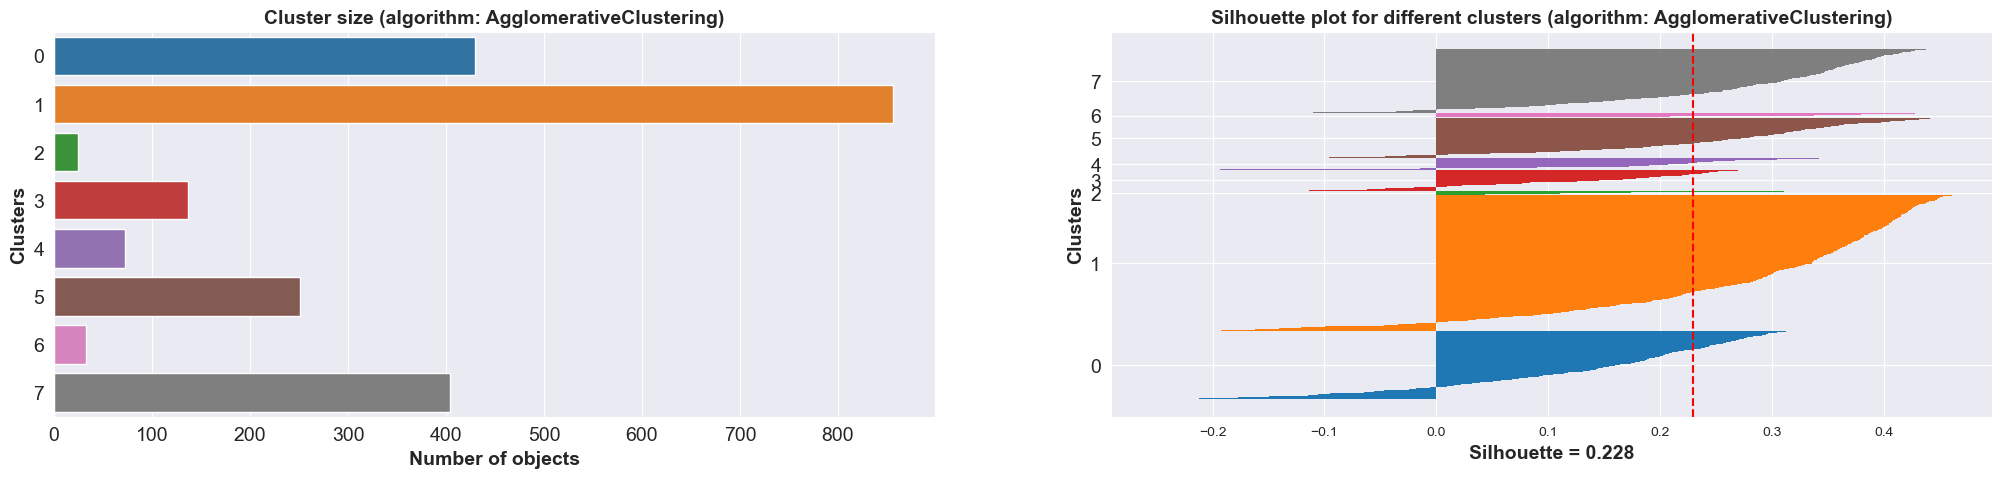

****************************************************************************************************************


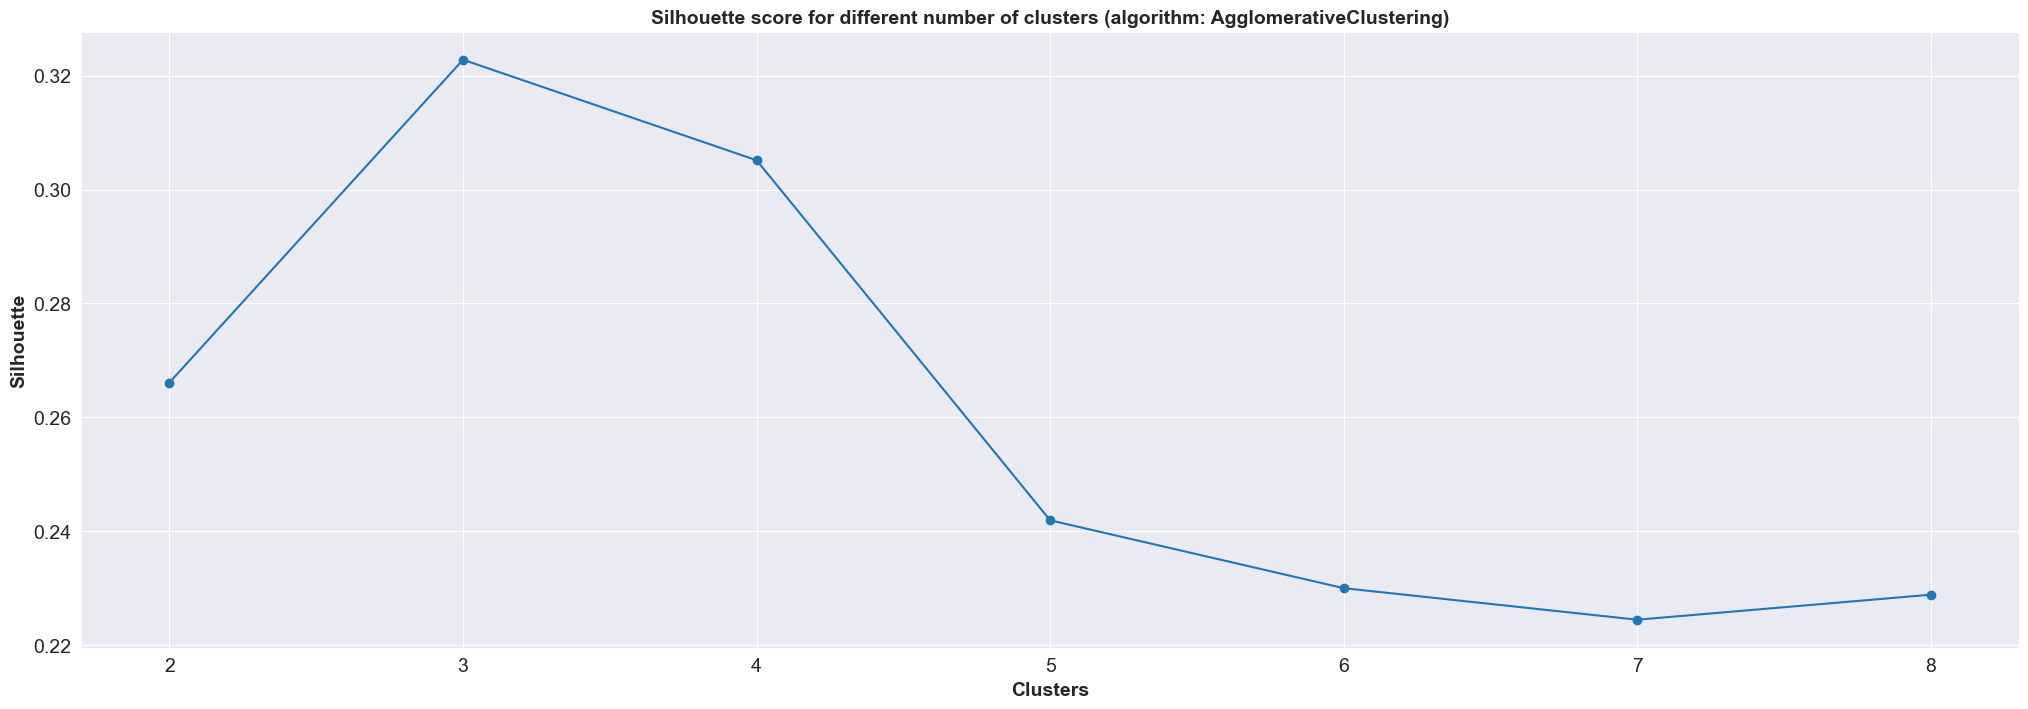

****************************************************************************************************************


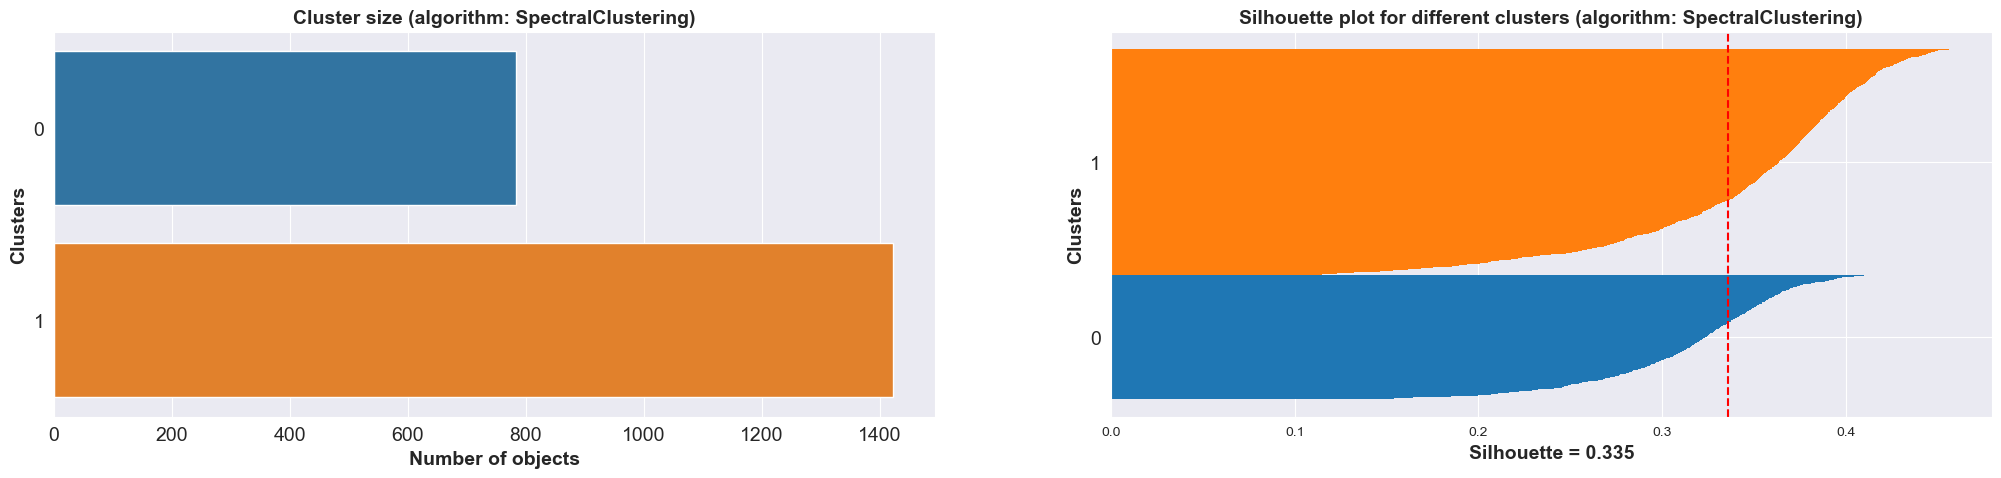

****************************************************************************************************************


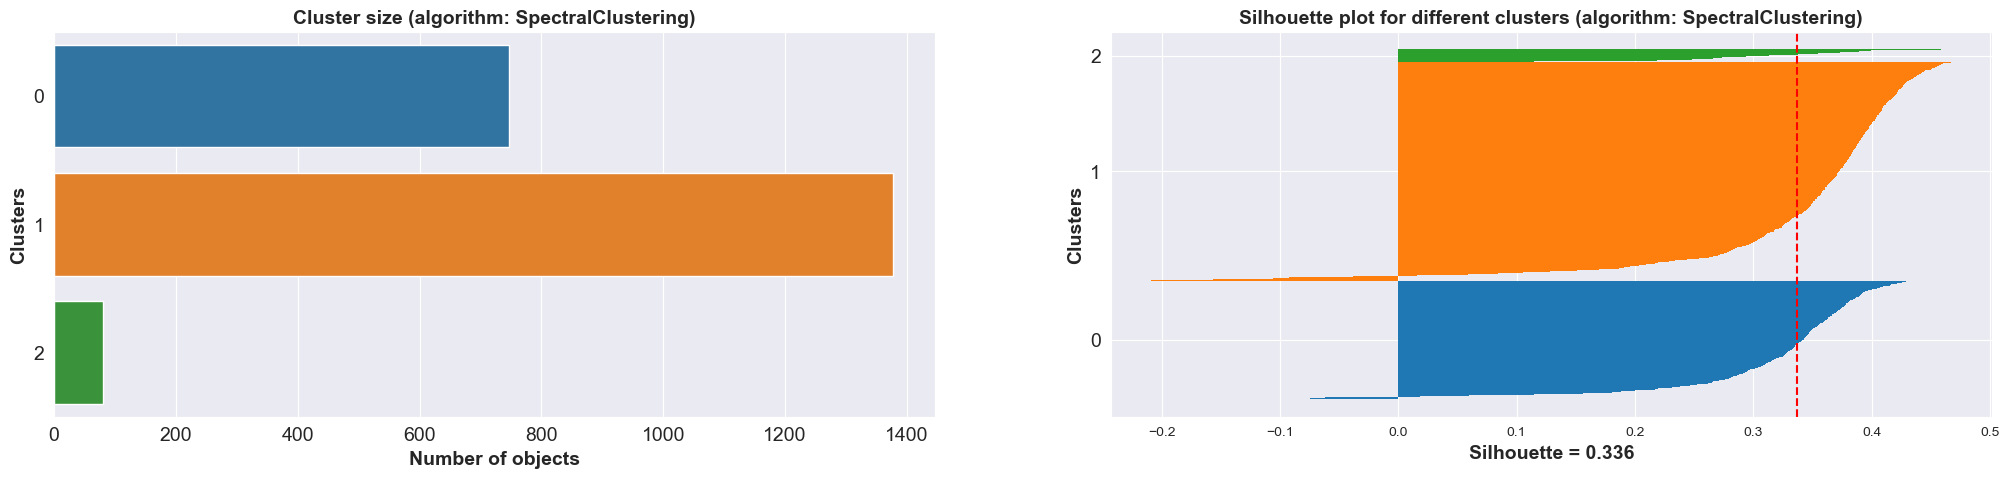

****************************************************************************************************************


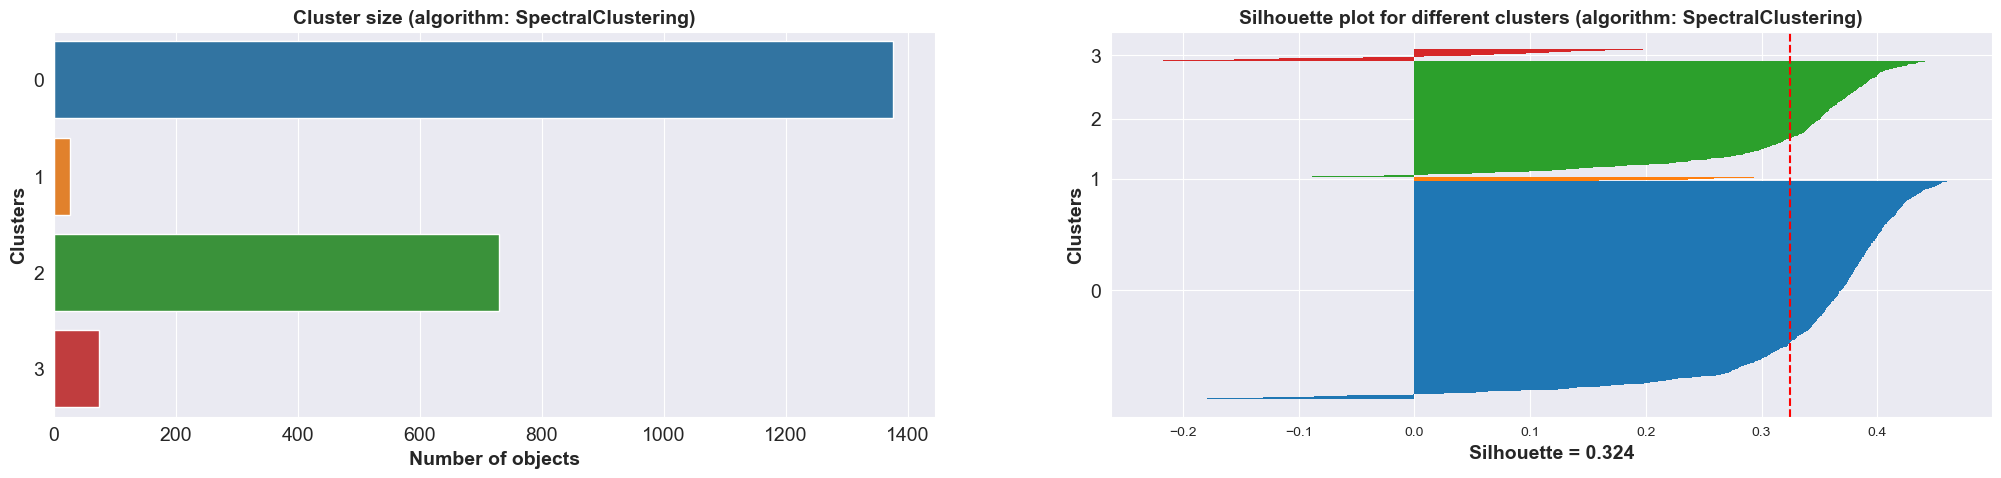

****************************************************************************************************************


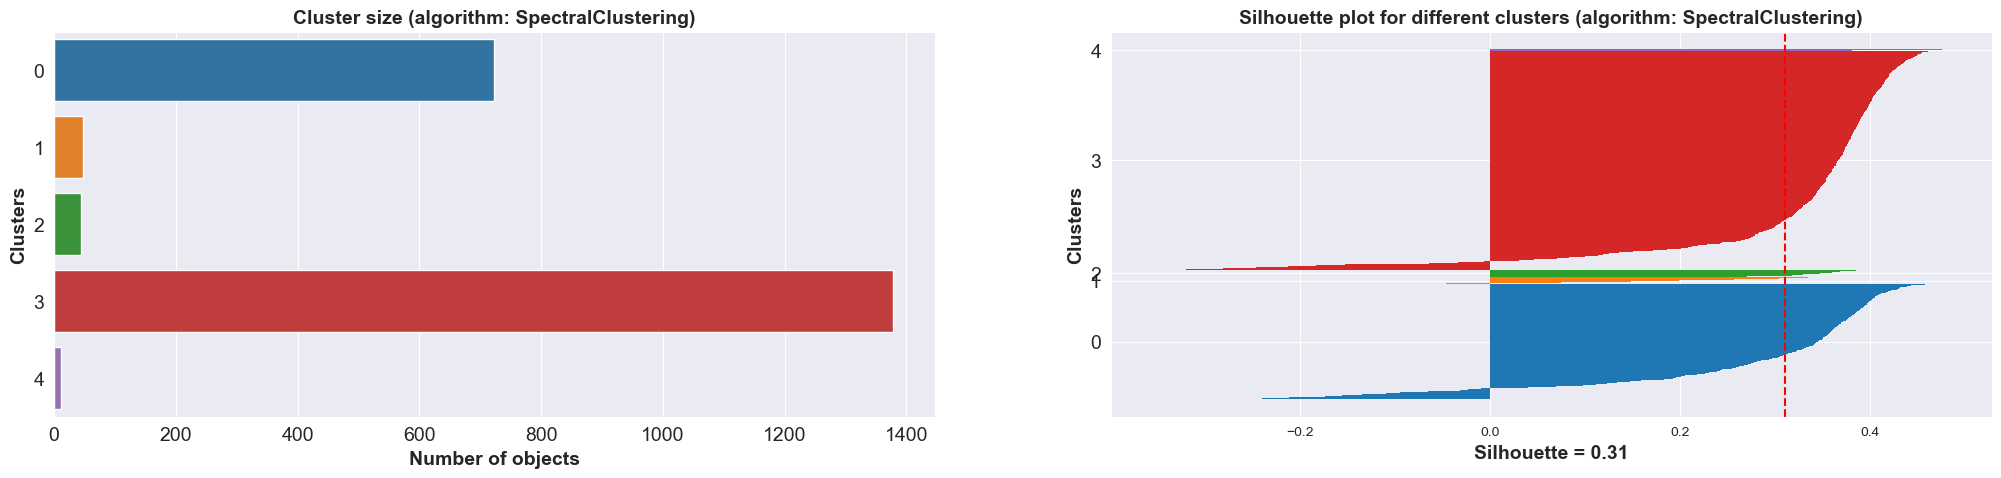

****************************************************************************************************************


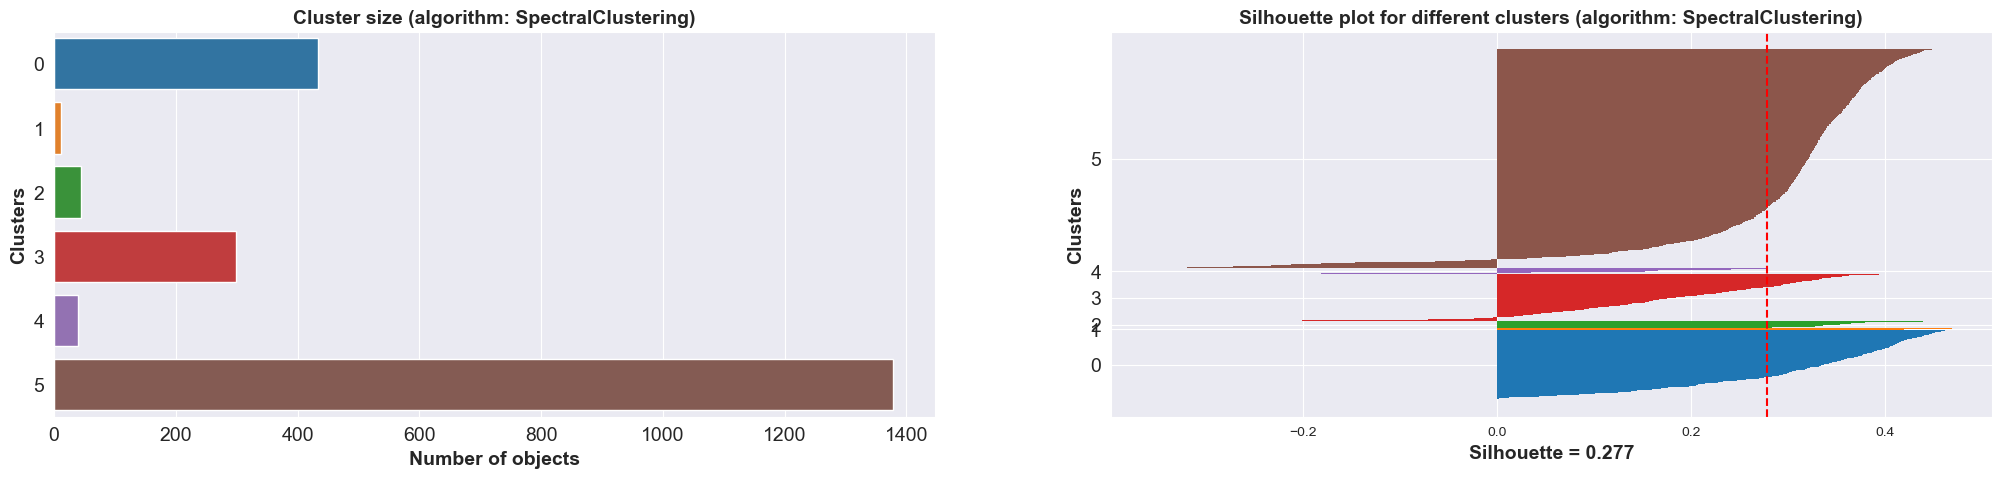

****************************************************************************************************************


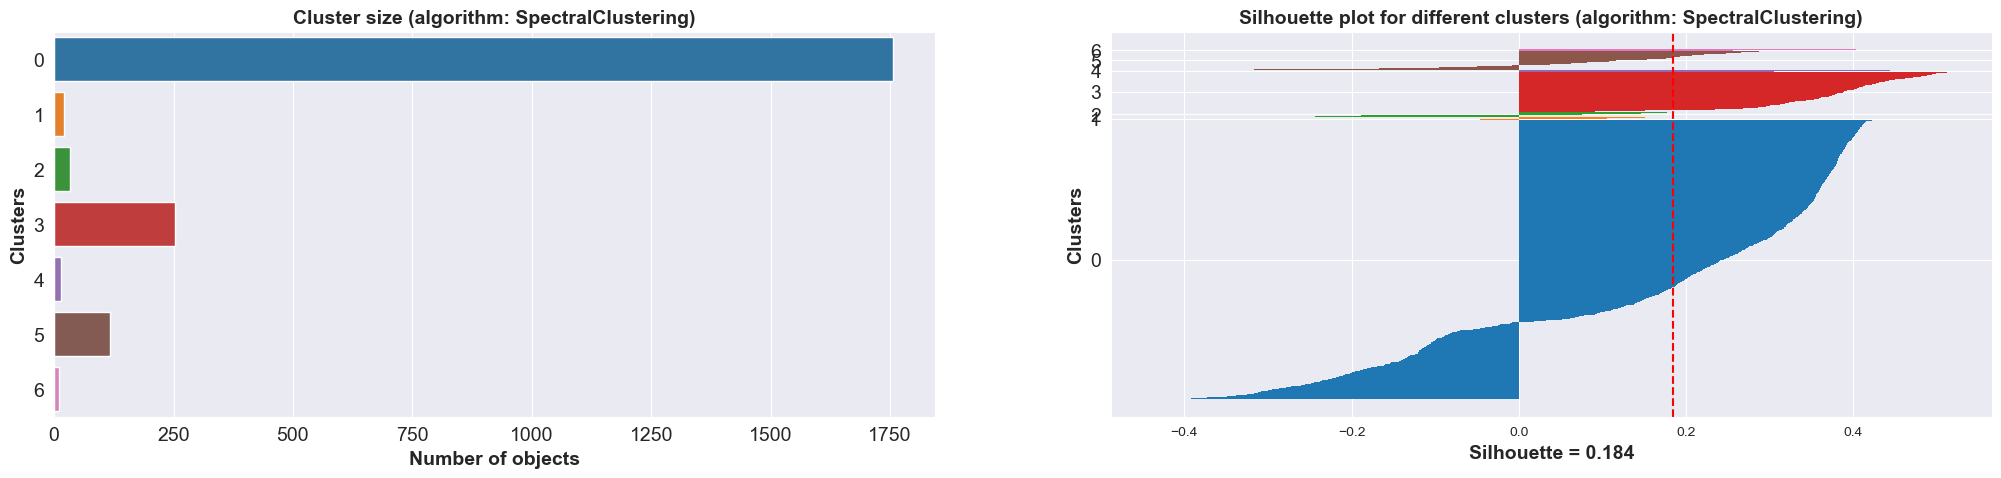

****************************************************************************************************************


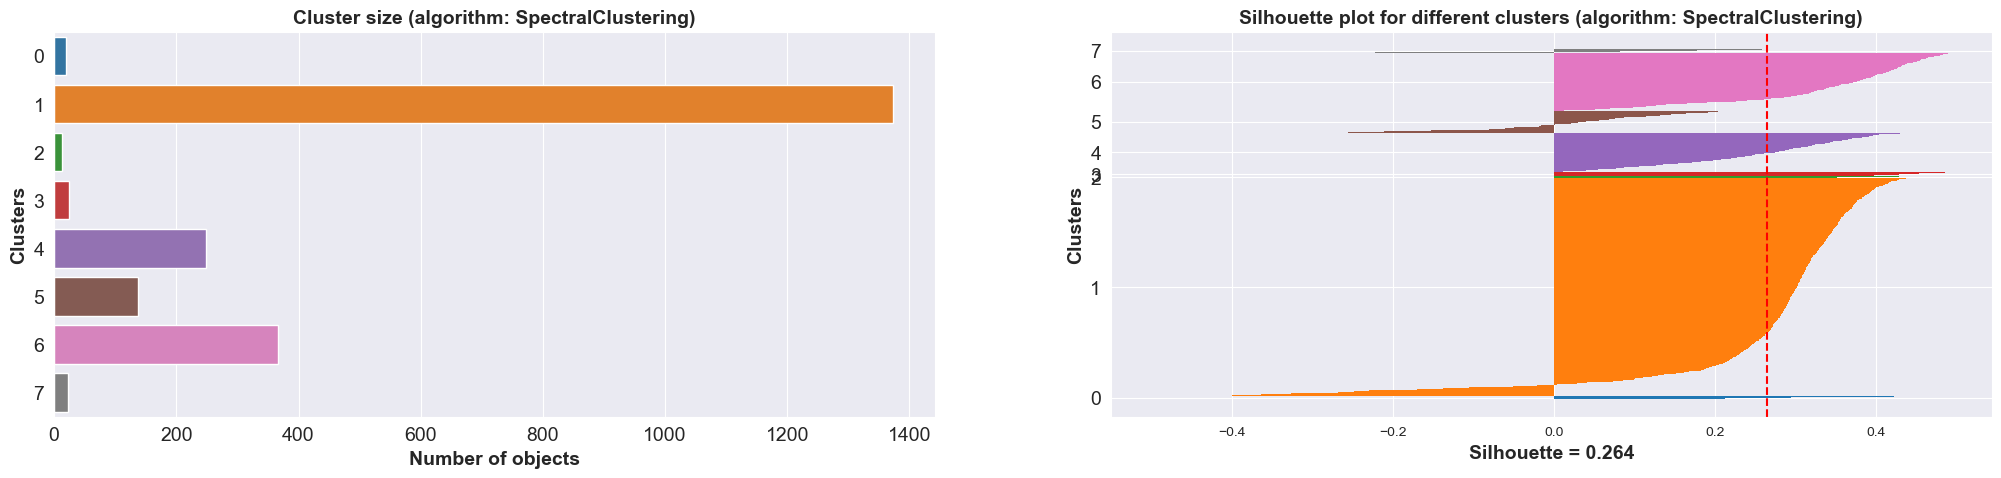

****************************************************************************************************************


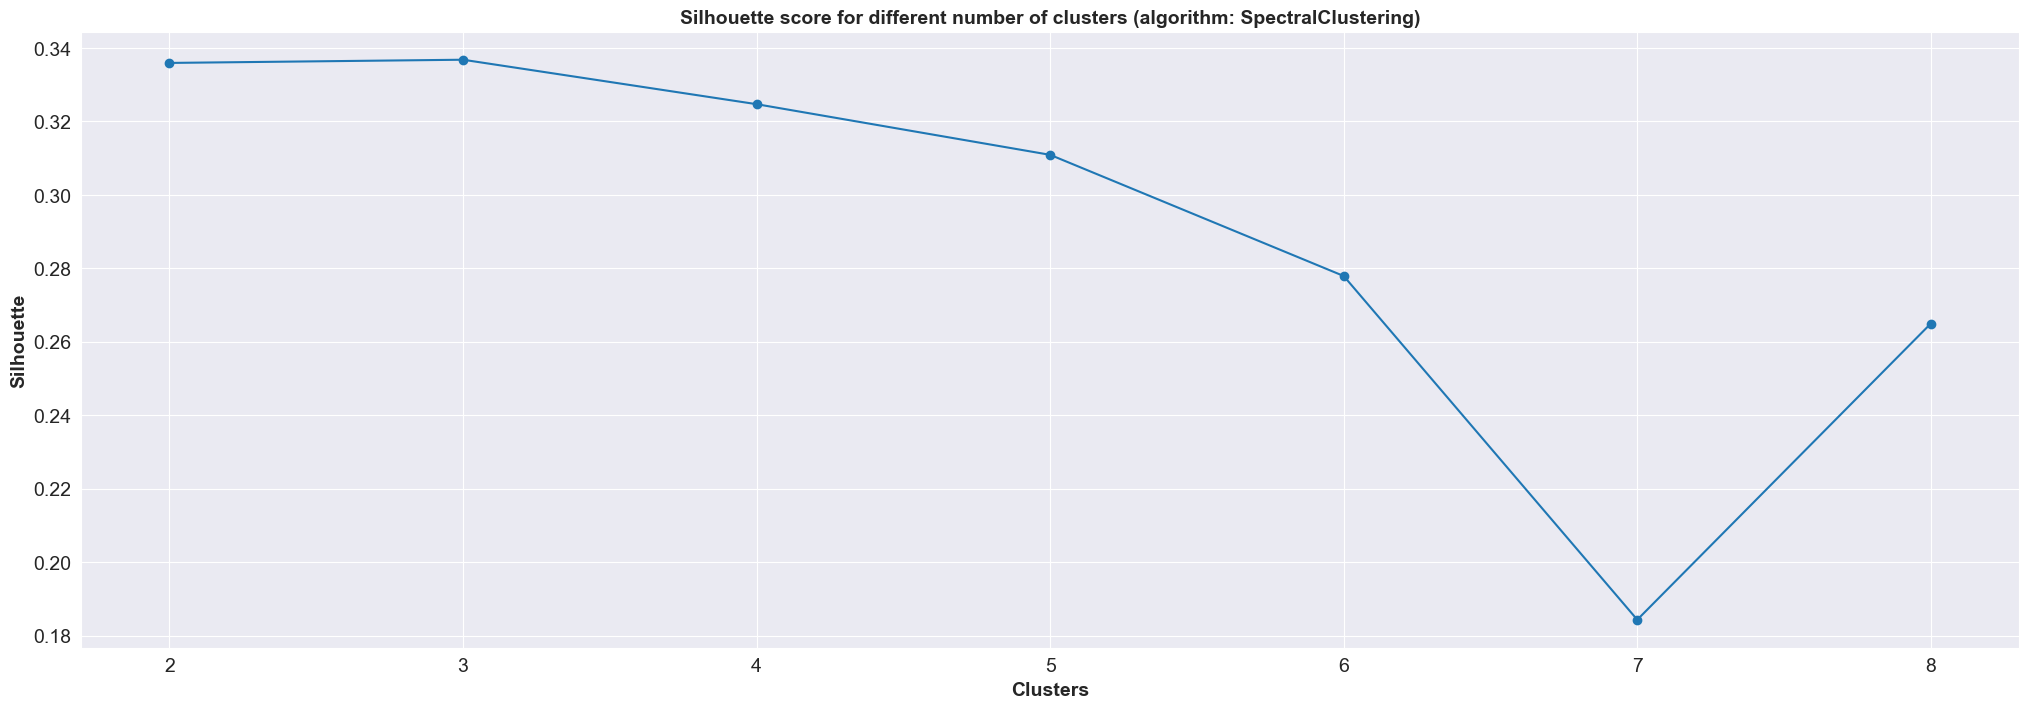

****************************************************************************************************************


In [32]:
class Clustering:
    algorithms = ['KMeans', 'AgglomerativeClustering', 'SpectralClustering']
    min_n_clusters = 2
    max_n_clusters = 8
    # Model distortions for different hyperparameters(n_clusters) 
    kmeans_distortions = []  
    
    @staticmethod
    def sse_plot(): 
        """Graphs for the SSE values (KMeans)"""
        plt.figure(figsize=(25, 8))
        sns.set_style("darkgrid")
        plt.title('Distortion values for different number of clusters (for Kmeans)', fontsize=14, fontweight='bold')
        plt.xlabel('Clusters', fontsize=14, fontweight='bold')
        plt.ylabel('SSE',fontsize=14, fontweight='bold')
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.plot(list(range(Clustering.min_n_clusters, Clustering.max_n_clusters + 1)), Clustering.kmeans_distortions, marker='o')
        plt.show()
        
    
    @staticmethod
    def silhouette_result(metrics_score:list, algorithm: str):
        plt.figure(figsize=(25, 8))
        sns.set_style("darkgrid")
        plt.title(f'Silhouette score for different number of clusters (algorithm: {algorithm})', fontsize=14, fontweight='bold')
        plt.xlabel('Clusters', fontsize=14, fontweight='bold')
        plt.ylabel('Silhouette', fontsize=14, fontweight='bold')
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.plot(list(range(Clustering.min_n_clusters, Clustering.max_n_clusters + 1)), metrics_score, marker='o')
        plt.show()
        print('*' * 112)
    
          
    def make_models(self, data_old: pd.DataFrame, data_modified: pd.DataFrame):  
        """Method for creating models"""
        for algorithm in Clustering.algorithms: 
             # metrics: silhouette score
            metrics = [] 
            for n_clusters in range(Clustering.min_n_clusters, Clustering.max_n_clusters + 1):  
                if algorithm == 'AgglomerativeClustering':
                    ac = AgglomerativeClustering(n_clusters=n_clusters,
                                                linkage='complete')
                    pred = ac.fit_predict(df_transform)
                    labels = pd.DataFrame(pred, columns =['Labels'], index=df.index)
                    metrics.append(silhouette_score(df_transform, labels))
                    Clustering.object_plot(labels, pred, algorithm)
                    
                if algorithm == 'SpectralClustering':
                    sc = SpectralClustering(n_clusters=n_clusters)
                    pred = sc.fit_predict(df_transform)
                    labels = pd.DataFrame(pred, columns =['Labels'], index=df.index)
                    metrics.append(silhouette_score(df_transform, labels))
                    Clustering.object_plot(labels, pred, algorithm)
                                              
                if algorithm == 'KMeans':  
                    kmeans = KMeans(n_clusters=n_clusters, 
                                    init="k-means++", 
                                    n_init=10,
                                    max_iter=280, 
                                    random_state=42)
                    pred = kmeans.fit_predict(df_transform) 
                    labels = pd.DataFrame(pred, columns=['Labels'], index=df.index)
                    metrics.append(silhouette_score(df_transform, labels))
                    Clustering.kmeans_distortions.append(kmeans.inertia_)  
                    Clustering.object_plot(labels, pred, algorithm)
                        
            if algorithm == 'KMeans':
                Clustering.sse_plot()
                print('*' * 112)
                    
            Clustering.silhouette_result(metrics, algorithm)
                                     
                        
    @staticmethod
    def object_plot(labs: pd.DataFrame, predict:np.array, algorithm:str):
        """Graphs of the number of objects in a cluster and the silhouette coefficient"""
        cluster_group = labs.groupby('Labels').size()
        plt.figure(figsize=(25, 5))
        plt.subplot(1, 2, 1)
        sns.set_style("darkgrid")
        plt.title(f'Cluster size (algorithm: {algorithm})', fontsize=14, fontweight='bold')
        sns.barplot(x=cluster_group.values, y=list(map(str, cluster_group.index)))
        plt.xlabel('Number of objects', fontsize=14, fontweight='bold')
        plt.ylabel('Сlusters', fontsize=14, fontweight='bold')
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
                
        plt.subplot(1, 2, 2)         
        cluster_labels = np.unique(predict)
        silhouette_vals = silhouette_samples(df_transform, predict, metric='euclidean')
        y_ax_lower, y_ax_upper = 0, 0
        yticks = []
        for i, с in enumerate(cluster_labels):
            c_silhouette_vals = silhouette_vals[predict == с]
            c_silhouette_vals.sort()
            y_ax_upper += len(c_silhouette_vals)
            plt.barh(range(y_ax_lower, y_ax_upper),
                   c_silhouette_vals,
                   height = 1,
                   edgecolor='none')

            yticks.append((y_ax_lower + y_ax_upper) / 2)
            y_ax_lower += len(c_silhouette_vals) 
        silhouette_avg = np.mean(silhouette_vals)
        plt.axvline(silhouette_avg, color="red", linestyle="--")
        sns.set_style("darkgrid")
        plt.title(f'Silhouette plot for different clusters (algorithm: {algorithm})', fontsize=14, fontweight='bold')   
        val = float(''.join([i for i in str(silhouette_avg)][0:5]))
        plt.xlabel(f'Silhouette = {val}', fontsize=14, fontweight='bold')
        plt.ylabel('Clusters', fontsize=14, fontweight='bold')
        plt.yticks(yticks, cluster_labels, fontsize=14)
        plt.show()
        print('*' * 112)

clustering = Clustering()
clustering.make_models(df, df_transform)

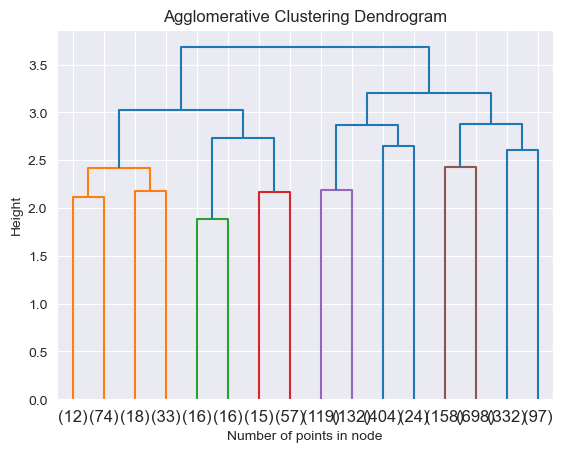

In [36]:
def make_dendogram(df_transform):
    # to generate the entire tree irrespective of clusters
    model_dendo = AgglomerativeClustering(n_clusters=None,
                                                    linkage='complete', distance_threshold=0)
    model_dendo.fit(df_transform)
    plt.title("Agglomerative Clustering Dendrogram")
    # plot the top three levels of the dendrogram
    plot_dendrogram(model_dendo, truncate_mode="level", p=3)
    plt.xlabel("Number of points in node")
    plt.ylabel("Height")
    plt.show()
    
make_dendogram(df_transform)

# What can we say from these graphs:  
* Good metric results for Agglomerative and Spectral Clustering algorithms  
* Best Model: AgglomerativeClustering(n_clusters=3).

### Main characteristics of features in the clusters proposed

In [ ]:
best_model = AgglomerativeClustering(n_clusters=3)
labels = pd.DataFrame(best_model.fit_predict(df_transform), columns=['Clusters'], index=df.index)
df = pd.concat([df, labels], axis=1)

In [ ]:
object_cols = ['Education', 'Kidhome', 'Teenhome', 'Family_Size', 'Alone', 'Partner']
num_cols = ['Income', 'Recency', 'MntWines',
            'MntFruits', 'MntMeatProducts', 'MntFishProducts',
            'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
            'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases',
            'NumWebVisitsMonth', 'Age', 'Years_Since_Registration',
            'Sum_Mnt', 'Num_Accepted_Cmp', 'Num_Total_Purchases']

In [ ]:
def graph_builder():
    """Graphs for the main characteristics 
    The best model was chosen based on the results of the graph"""
    def boxplot():
        n_cols = len(num_cols)
        rows = n_cols // 3 
        _, axes = plt.subplots(ncols=3, nrows=rows, figsize=(25, 5 * rows))
        plt.subplots_adjust(wspace=0.3, hspace=0.4)
        for num, col in enumerate(num_cols):
            b = sns.boxplot(
                 data=df,
                 y=col,
                 x="Clusters",
                 palette="Paired",
                 ax=axes.reshape(-1)[num])
            b.set_xlabel('Clusters', fontsize=14)
            b.set_ylabel(f'{df[col].name}', fontsize=14)
            sns.set_style('darkgrid')
    
    def histplot():    
        n_cols = len(num_cols)
        rows = n_cols // 3
        _, axes = plt.subplots(ncols=3, nrows=rows, figsize=(25, 5 * rows))
        plt.subplots_adjust(wspace=0.3, hspace=0.4)
        for num, col in enumerate(num_cols):
            h = sns.histplot(
                 data=df,
                 x=col,
                 hue="Clusters",
                 multiple="stack",
                 kde=True,
                 palette="Paired",
                 ax=axes.reshape(-1)[num])
                
            h.set_xlabel(f'{df[col].name}', fontsize=14)
            h.set_ylabel('Count', fontsize=14)
            sns.set_style('darkgrid')
            
    def barplot():
        n_cols = len(object_cols)
        rows = n_cols // 3 + n_cols % 3
        size_cluster = df.groupby("Clusters").count().iloc[:, 0]
        _, axes = plt.subplots(ncols=3, nrows=rows, figsize=(25, 5 * rows))
        plt.subplots_adjust(wspace=0.3, hspace=0.4)    
        for num, col in enumerate(object_cols):
            data = (df.groupby(["Clusters"])[col].value_counts().unstack(fill_value=0).T)
            data = pd.DataFrame(data.unstack())
            data.columns = ["Number of objects"]
            data = data.reset_index()
            b= sns.barplot(
                 data=data,
                 x=data[col],
                 hue=data.Clusters,
                 y=data['Number of objects'],
                 ax=axes.reshape(-1)[num])
            b.set_xlabel(f'{data[col].name}', fontsize=14)
            b.set_ylabel('Number of objects', fontsize=14)
            sns.set_style('darkgrid')
    
    boxplot()
    histplot()
    barplot()
    
graph_builder()

# As a result of cluster analysis, we received three groups of buyers (clusters):
# 0 cluster:
* Middle income people (average income equals 50000)
* Average age is 52 years
* Have an education (Graduation, 2n Cycle, Master, PhD)
* People without family, people with families with and without children
* Quite often buy wines, but they also often buy meat
* Most often make purchases on the web
* The average number of purchases is 13

# 1 cluster:
* High income people (average income equals 70000)
* Average age is 55 years
* Have an education (Graduation, 2n Cycle, Master, PhD)
* Have a family with children (Teenhome)
* Quite often buy wines, but they also often buy meat
* Most often make purchases in the stores themselves
* Most often make purchases (compared to other clusters)

# 2 cluster:
* Average income equals 38000 
* Average age is 49 years
* Have an education (Graduation, 2n Cycle, Master, PhD)
* People with families with and without children
* A low number of purchases and, accordingly, spend little money on purchases 